<a id='sommaire'></a>
<h1 style='text-align:center;border:5px double;border-color:gray;'>
    <br/>
     PROJET 7<br/>
    <br/>
    <font color = 'orange'>"Effectuez une prédiction de revenus"</font><br/>
    <br/>
</h1>

## [Mission 1](#m1)
* [Analyse des données brutes](#1)  
* [Correction des données](#2)  
* [Ajout de la population](#3) 

## [Mission 2](#m2)
* [Diversité des distributions de revenus](#4)  
* [Représentation des indices de Gini](#5)  
* [Evolution des indices de Gini](#6)  
* [Calcul de l'indice de Gini à partir du fichier de la World Income Distribution](#7)  
* [Classement par indice de Gini](#8) 

## [Mission 3](#m3)  
* [Ajout du coefficient d'élasticité](#9)  
* [Distribution condition conditionnelles](#10)
* [Application du protocole sur nos données](#11)  


## [Mission 4](#m4)  
* [ANOVA de la variable revenus des enfants en fonction du pays](#12)  
* [Régression linéaire du revenu enfant sur le revenu moyen du pays et l'indice de Gini](#14)  
* [Régression linéaire du revenu enfant sur le revenu moyen du pays, l'indice de Gini et la classe de revenus des parents](#15) 
 

Importer les libraries

In [1]:
# Calculs & dataframes
import pandas as pd
import numpy as np
from math import pi
import scipy.stats as st
from scipy.stats import t, shapiro, ks_2samp

from collections import Counter
import dtale
from collections import Counter
import random

# Librairies graphiques
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Fonction
from functions1 import *

<a id='m1'></a>

<a id='m1'></a>
## Mission 1 

<a id='1'></a>
<h3 ><font color=green>Analyse des données brutes</font></h3>

[Haut de page](#sommaire)

In [2]:
# Chargement du fichier de la World Income Distribution
df = pd.read_csv('data-projet7.csv')
print(df.shape)
display(df.head())
display(df.tail())
#display(df.describe(include='object'))
display(df.info())

(11599, 6)


,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297


,country,year_survey,quantile,nb_quantiles,income,gdpppp
11594,COD,2008,96,100,"810,6233","303,19305"
11595,COD,2008,97,100,"911,7834","303,19305"
11596,COD,2008,98,100,"1057,8074","303,19305"
11597,COD,2008,99,100,"1286,6029","303,19305"
11598,COD,2008,100,100,"2243,1226","303,19305"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       11599 non-null  object
 1   year_survey   11599 non-null  int64 
 2   quantile      11599 non-null  int64 
 3   nb_quantiles  11599 non-null  int64 
 4   income        11599 non-null  object
 5   gdpppp        11399 non-null  object
dtypes: int64(3), object(3)
memory usage: 543.8+ KB


None

In [3]:
#objet to numerique
df['income'] = pd.to_numeric(df['income'].str.replace(',','.'), errors='coerce')
df['gdpppp'] = pd.to_numeric(df['gdpppp'].str.replace(',','.'), errors='coerce')

In [4]:
dtale.show(df)

In [5]:
df.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

In [6]:
# Description par année
df.groupby(by=['year_survey']).nunique()

,country,quantile,nb_quantiles,income,gdpppp
year_survey,,,,,
2004,1,100,1,100,1
2006,5,100,1,500,5
2007,15,100,1,1500,15
2008,76,100,1,7598,75
2009,12,100,1,1200,11
2010,6,100,1,600,6
2011,1,100,1,100,1


Text(0.5, 1.0, 'années des données utilisées')

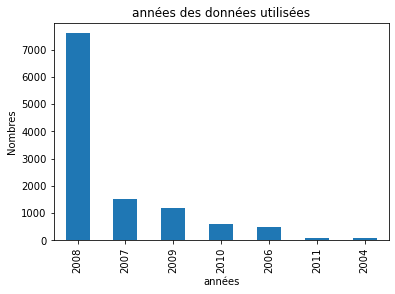

In [7]:
#print(df.year_survey.value_counts())
df.year_survey.value_counts().plot(kind='bar')
plt.xlabel('années')
plt.ylabel('Nombres')
plt.title('années des données utilisées')

<AxesSubplot:ylabel='year_survey'>

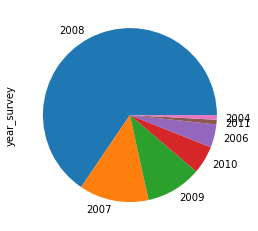

In [8]:
df.year_survey.value_counts().plot(kind='pie')

In [9]:
df.country.value_counts()

ALB    100
POL    100
PER    100
PAN    100
PAK    100
      ... 
GBR    100
FRA    100
FJI    100
COD    100
LTU     99
Name: country, Length: 116, dtype: int64

In [10]:
# Chargement du fichier nom du pays en anglais
code_pays = pd.read_csv("country_code.csv")
code_pays = code_pays[['Pays', 'ISO3']]
print(code_pays.shape)
code_pays.head()

(247, 2)


,Pays,ISO3
0,Afghanistan,AFG
1,Aland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [11]:
# Jointure de df et de code_pays
df_income_pay = pd.merge(df, code_pays, how='left', left_on='country', right_on='ISO3')
print(df_income_pay.shape)
df_income_pay.head()

(11599, 8)


,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB


In [12]:
df_income_pay.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
Pays            100
ISO3            100
dtype: int64

<AxesSubplot:>

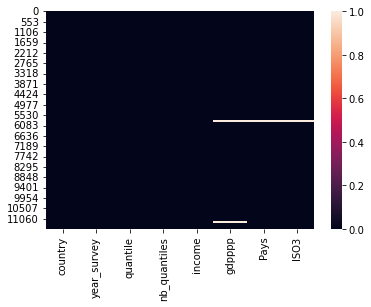

In [13]:
sns.heatmap(df_income_pay.isna())

In [14]:
df_income_pay[df_income_pay.isnull().any(axis=1)]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
5800,XKX,2008,1,100,437.89370,NaN,NaN,NaN
5801,XKX,2008,2,100,508.17133,NaN,NaN,NaN
5802,XKX,2008,3,100,591.82820,NaN,NaN,NaN
5803,XKX,2008,4,100,668.00000,NaN,NaN,NaN
5804,XKX,2008,5,100,730.40220,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11294,PSE,2009,96,100,2763.88480,NaN,Palestinian Territory Occupied,PSE
11295,PSE,2009,97,100,3077.83330,NaN,Palestinian Territory Occupied,PSE
11296,PSE,2009,98,100,3449.22240,NaN,Palestinian Territory Occupied,PSE
11297,PSE,2009,99,100,4165.99700,NaN,Palestinian Territory Occupied,PSE


<a id='2'></a>
<h3 style='color:#8677b2'>Correction des données</h3>

[Haut de page](#sommaire)

In [15]:
df_income_pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11399 non-null  float64
 6   Pays          11499 non-null  object 
 7   ISO3          11499 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 815.6+ KB


In [16]:
# Affectation du code ISO3, du nom du pays et du GDP PPP
df_income_pay['gdpppp'] = np.where(df_income_pay['country'] == 'XKX' ,  7530.632, df_income_pay['gdpppp'])
df_income_pay['ISO3'] = np.where(df_income_pay['country'] == 'XKX' ,  'XKX', df_income_pay['ISO3'])
df_income_pay['Pays'] = np.where(df_income_pay['country'] == 'XKX' ,  'Kosovo' , df_income_pay['Pays'])

df_income_pay.loc[df_income_pay['country'] == 'XKX'].head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
5800,XKX,2008,1,100,437.8937,7530.632,Kosovo,XKX


In [17]:
# # Affectation du code ISO3, du nom du pays et du GDP PPP
# df_income_pay.loc[df_income_pay['country'] == 'XKX', 'ISO3'] = 'XKX'
# df_income_pay.loc[df_income_pay['country'] == 'XKX', 'Pays'] = 'Kosovo'
# df_income_pay.loc[df_income_pay['country'] == 'XKX', 'gdpppp'] = 7530.632

# df_income_pay.loc[df_income_pay['country'] == 'XKX'].head(1)

<p style='color:#88cc8d;text-align:center'>
    Les données manquantes sont remplacées par des valeurs issues de la Banque Mondiale<br/>
    <a href="https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD?locations=XK">Source</a><br/> 
</p>

In [18]:
# Affectation du GDP PPP
df_income_pay['gdpppp'] = np.where(df_income_pay['country'] == 'PSE' ,  3612.14 , df_income_pay['gdpppp'])

df_income_pay.loc[df_income_pay['country'] == 'PSE'].head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
11199,PSE,2009,1,100,195.2899,3612.14,Palestinian Territory Occupied,PSE


<p style='color:#88cc8d;text-align:center'>
    Les données manquantes sont remplacées par des valeurs issues du site theglobaleconomy.com<br/>
    <a href="https://www.theglobaleconomy.com/Palestine/GDP_per_capita_PPP/">Source</a><br/> 
</p>

In [19]:
# Affichage du GDP PPP maxi
df_income_pay.groupby('country').mean().sort_values('gdpppp').tail()

,year_survey,quantile,nb_quantiles,income,gdpppp
country,,,,,
IRL,2008.0,50.5,100.0,17710.735838,39268.0
USA,2008.0,50.5,100.0,25503.581661,43261.0
NOR,2008.0,50.5,100.0,22483.375020,49070.0
LUX,2008.0,50.5,100.0,25217.562681,73127.0
FJI,2008.0,50.5,100.0,2098.730882,4300332.0


In [20]:
# Affectation d'une valeur de GDP PPP plus cohérente
df_income_pay.loc[df_income_pay['country'] == 'FJI', 'gdpppp'] = 7384.086
df_income_pay.loc[df_income_pay['country'] == 'FJI'].head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
3200,FJI,2008,1,100,308.17334,7384.086,Fiji,FJI


<p style='color:#88cc8d;text-align:center'>
    Les données manquantes sont remplacées par des valeurs issues de la Banque Mondiale<br/>
    <a href="https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD?locations=FJ">Source</a><br/> 
</p>

In [21]:
df_LTU = df_income_pay[df_income_pay['country'] == 'LTU']
df_LTU

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
6200,LTU,2008,1,100,566.3453,17571.0,Lithuania,LTU
6201,LTU,2008,2,100,1147.0587,17571.0,Lithuania,LTU
6202,LTU,2008,3,100,1490.8408,17571.0,Lithuania,LTU
6203,LTU,2008,4,100,1746.5715,17571.0,Lithuania,LTU
6204,LTU,2008,5,100,1842.9542,17571.0,Lithuania,LTU
...,...,...,...,...,...,...,...,...
6294,LTU,2008,96,100,14597.0360,17571.0,Lithuania,LTU
6295,LTU,2008,97,100,15659.0080,17571.0,Lithuania,LTU
6296,LTU,2008,98,100,17883.8770,17571.0,Lithuania,LTU
6297,LTU,2008,99,100,22551.1700,17571.0,Lithuania,LTU


In [22]:
df_LTU['quantile'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [23]:
# Calcul du quantile manquant par la moyenne des quantiles autour
inc_LTU = df_income_pay.loc[(df_income_pay['country'] == 'LTU') & (df_income_pay['quantile'] == 42) |
        (df_income_pay['country'] == 'LTU') & (df_income_pay['quantile'] == 40),'income'].mean()

inc_LTU

4882.14065

In [24]:
#Ajouter quantile 41 a DataFrame
df_income_pay.loc[len(df_income_pay.index)] = ['LTU', 2008, 41, 100, inc_LTU, 17571.0, 'Lithuania', 'LTU' ]
#Vérification
display(df_income_pay.tail(3))

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
11597,COD,2008,99,100,1286.60290,303.19305,Congo Democratic Republic of the,COD
11598,COD,2008,100,100,2243.12260,303.19305,Congo Democratic Republic of the,COD
11599,LTU,2008,41,100,4882.14065,17571.00000,Lithuania,LTU


In [25]:
# Tri en place
df_income_pay.sort_values(by=['country', 'quantile', 'year_survey'], inplace=True)
print(df_income_pay.shape)
df_income_pay.tail(3)

(11600, 8)


,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
11496,ZAF,2008,98,100,35750.290,9602.0,South Africa,ZAF
11497,ZAF,2008,99,100,46297.316,9602.0,South Africa,ZAF
11498,ZAF,2008,100,100,82408.550,9602.0,South Africa,ZAF


In [26]:
# Vérification des valeurs nulles
df_income_pay.isnull().sum()

country         0
year_survey     0
quantile        0
nb_quantiles    0
income          0
gdpppp          0
Pays            0
ISO3            0
dtype: int64

<a id='3'></a>
<h3 style='color:#8677b2'>Ajout de la population</h3>

[Haut de page](#sommaire)

In [27]:
# Chargement du fichier des populations
pop = pd.read_csv('population.csv', skiprows=4)

# Restriction sur les colonnes utiles
pop = pop[['Country Code', '2008']]

# Filtre des pays par le code ISO3
pop_monde = pd.merge(code_pays, pop, how='left', left_on='ISO3', right_on='Country Code')

print('# df Pour calculer de la population mondiale')
display(pop_monde.head(3))
print('=======================================================')
print("# df Pour calculer de la population couverte par l'étude")
display(pop.head(3))


# df Pour calculer de la population mondiale


,Pays,ISO3,Country Code,2008
0,Afghanistan,AFG,AFG,27294031.0
1,Aland Islands,ALA,NaN,NaN
2,Albania,ALB,ALB,2947314.0


# df Pour calculer de la population couverte par l'étude


,Country Code,2008
0,ABW,101353.0
1,AFG,27294031.0
2,AGO,21759420.0


<p style='color:#88cc8d;text-align:center'>
    Le fichier des tailles de populations provient de la banque mondiale:<br/>
    <a href="https://donnees.banquemondiale.org/indicateur/sp.pop.totl">Source</a><br/> 
</p>

In [28]:
# Jointure de wid2 et de pop_monde
df_income_pay_pop = pd.merge(df_income_pay, pop_monde, how='left', on=['Pays', 'ISO3'])
df_income_pay_pop.head(3)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3,Country Code,2008
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,ALB,2947314.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,ALB,2947314.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,ALB,2947314.0


In [29]:
# Restriction des colonnes utiles
df_income_pay_pop = df_income_pay_pop[['Pays', 'quantile', 'income', 'gdpppp', 'ISO3', '2008']]

# Modification du nom de la colonne contenant les populations
df_income_pay_pop.rename(columns = {'2008' : 'Population'}, inplace = True)

print(df_income_pay_pop.shape)
df_income_pay_pop.head(3)

(11600, 6)


,Pays,quantile,income,gdpppp,ISO3,Population
0,Albania,1,728.89795,7297.0,ALB,2947314.0
1,Albania,2,916.66235,7297.0,ALB,2947314.0
2,Albania,3,1010.91600,7297.0,ALB,2947314.0


In [30]:
# Vérification des valeurs manquantes
df_income_pay_pop.isnull().sum()

Pays            0
quantile        0
income          0
gdpppp          0
ISO3            0
Population    200
dtype: int64

In [31]:
pop_nan = df_income_pay_pop.groupby('Pays').nunique()
pop_nan.head(3)

,quantile,income,gdpppp,ISO3,Population
Pays,,,,,
Albania,100,100,1,1,1
Argentina,100,100,1,1,1
Armenia,100,100,1,1,1


In [32]:
# Identification des pays incomplets
pop_nan[pop_nan['Population'] == 0]

,quantile,income,gdpppp,ISO3,Population
Pays,,,,,
Kosovo,100,100,1,1,0
Taiwan Republic of China,100,100,1,1,0


In [33]:
# Affectation manuelle des valeurs manquantes
df_income_pay_pop.loc[df_income_pay_pop['Pays'] == 'Kosovo', 'Population'] = 1_747_400
df_income_pay_pop.loc[df_income_pay_pop['Pays'] == 'Taiwan Republic of China', 'Population'] = 23_037_000

<p style='color:#88cc8d;text-align:center'>
    Les données manquantes pour le Kosovo sont remplacées par des valeurs issues de la banque mondiale<br/>
    <a href="https://www.google.fr/publicdata/explore?ds=d5bncppjof8f9_&met_y=sp_pop_totl&hl=fr&dl=fr#!ctype=l&strail=false&bcs=d&nselm=h&met_y=sp_pop_totl&scale_y=lin&ind_y=false&rdim=region&idim=country:XKX&ifdim=region&hl=fr&dl=fr&ind=false">Source</a><br/> 
</p>
<p style='color:#88cc8d;text-align:center'>
    Les données manquantes pour Taiwan sont remplacées par des valeurs issues du site countryeconomy.com<br/>
    <a href="https://countryeconomy.com/demography/population/taiwan?year=2008">Source</a><br/> 
</p>

In [34]:
print(df_income_pay_pop.shape)
df_income_pay_pop.isnull().sum()

(11600, 6)


Pays          0
quantile      0
income        0
gdpppp        0
ISO3          0
Population    0
dtype: int64

In [35]:
# Calcul de la population couverte par l'étude
inter = df_income_pay_pop.groupby(by='Pays').mean()
pop_couv = inter['Population'].sum()

print(f"Population couverte par l'étude = {pop_couv}")

Population couverte par l'étude = 6210658108.0


In [36]:
# Calcul de la population mondiale 
inter1 = pop_monde['2008'].sum()

print(f"Population mondiale  = {inter1}")

Population mondiale  = 6741214175.0


In [37]:
# Pourcentage de la population couverte par l'étude
pourcentage_etude = 100 * pop_couv / inter1

print(f"Pourcentage de la population couverte par l'étude  = {pourcentage_etude}")

Pourcentage de la population couverte par l'étude  = 92.12966606271637


<a id='m2'></a>

<a id='m2'></a>
## Mission 2

<a id='4'></a>
<h3 style='color:#8677b2'>Diversité des distributions de revenus</h3>

[Haut de page](#sommaire)

In [38]:
# Description des données par pays
df_income_pay_pop_group = df_income_pay_pop.groupby(by='Pays').mean()
df_income_pay_pop_group.reset_index(inplace=True)
df_income_pay_pop_group.sort_values('income').tail()

,Pays,quantile,income,gdpppp,Population
81,Norway,50.5,22483.375020,49070.0,4768212.0
16,Canada,50.5,23739.640518,35895.0,33245773.0
63,Luxembourg,50.5,25217.562681,73127.0,488650.0
111,United States of America,50.5,25503.581661,43261.0,304093966.0
44,Iceland,50.5,26888.511518,36527.0,317414.0


In [39]:
df_income_pay_pop_group.sort_values('income').head()

,Pays,quantile,income,gdpppp,Population
21,Congo Democratic Republic of the,50.5,276.016044,303.19305,60373608.0
65,Madagascar,50.5,345.237074,950.00000,19996469.0
23,Cote d'Ivoire,50.5,399.835204,1526.00000,19497986.0
55,Kenya,50.5,519.320032,1429.00000,39148416.0
99,Swaziland,50.5,530.283828,4748.00000,1158897.0


In [40]:
df_income_pay_pop_group.describe()

,quantile,income,gdpppp,Population
count,116.0,116.000000,116.000000,1.160000e+02
mean,50.5,6069.121925,12440.466006,5.354016e+07
std,0.0,6660.966925,13151.884845,1.682490e+08
min,50.5,276.016044,303.193050,3.174140e+05
25%,50.5,1374.270126,2577.500000,4.698545e+06
50%,50.5,3287.174692,7517.816000,1.407229e+07
75%,50.5,7077.900152,17679.250000,3.945691e+07
max,50.5,26888.511518,73127.000000,1.324655e+09


In [41]:
# Pays avec les revenus moyens les plus faibles
df_income_pay_pop_group[df_income_pay_pop_group['income'] < 277]

,Pays,quantile,income,gdpppp,Population
21,Congo Democratic Republic of the,50.5,276.016044,303.19305,60373608.0


In [42]:
# Pays avec les revenus moyens premier quartile
df_income_pay_pop_group[(df_income_pay_pop_group['income'] > 1370) & (df_income_pay_pop_group['income'] < 1380)]

,Pays,quantile,income,gdpppp,Population
114,Viet Nam,50.5,1377.773966,2578.0,86707801.0


In [43]:
# Pays avec les revenus moyens médians
df_income_pay_pop_group[(df_income_pay_pop_group['income'] > 3270) & (df_income_pay_pop_group['income'] < 3290)]

,Pays,quantile,income,gdpppp,Population
85,Paraguay,50.5,3278.080965,4347.0,6047117.0


In [44]:
# Pays avec les revenus moyens troisième quartile
df_income_pay_pop_group[(df_income_pay_pop_group['income'] > 7045) & (df_income_pay_pop_group['income'] < 7105)]

,Pays,quantile,income,gdpppp,Population
18,Chile,50.5,7051.609966,13390.0,16661942.0


In [45]:
# Pays avec les revenus moyens les plus forts
df_income_pay_pop_group[df_income_pay_pop_group['income'] > 26880]

,Pays,quantile,income,gdpppp,Population
44,Iceland,50.5,26888.511518,36527.0,317414.0


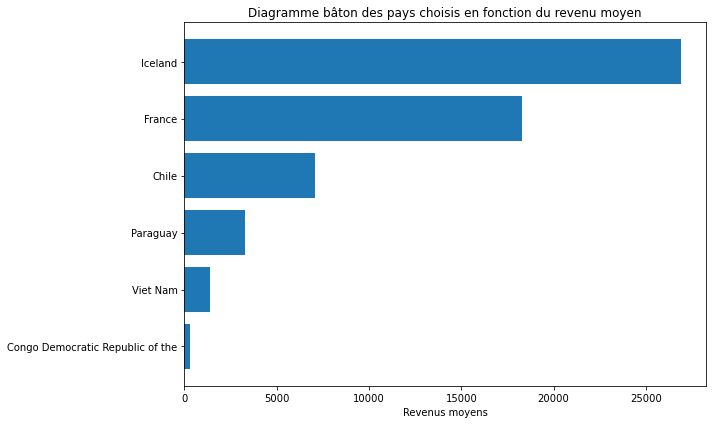

In [46]:
incm_inter = df_income_pay_pop_group[(df_income_pay_pop_group['Pays'] == 'France') |
                     (df_income_pay_pop_group['Pays'] == 'Congo Democratic Republic of the') |
                     (df_income_pay_pop_group['Pays'] == 'Viet Nam') |
                     (df_income_pay_pop_group['Pays'] == 'Paraguay') |
                     (df_income_pay_pop_group['Pays'] == 'Chile') |
                     (df_income_pay_pop_group['Pays'] == 'Iceland')].sort_values('income')

# Paramètres généraux
plt.figure(figsize=(10,6))

# Paramètres graphiques
plt.barh(incm_inter.Pays, incm_inter.income)

# Métadonnées
plt.title('Diagramme bâton des pays choisis en fonction du revenu moyen')
plt.xlabel('Revenus moyens')
plt.tight_layout() # Permet de ne pas couper les labels


plt.show()

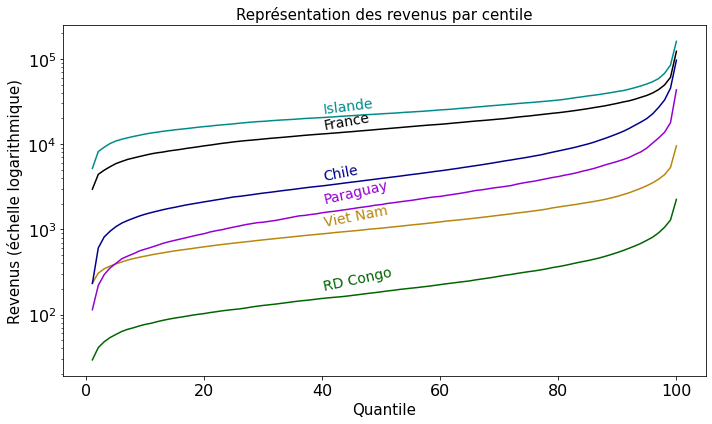

In [47]:
# Préparation des données par pays choisis
incm_fra = df_income_pay_pop[df_income_pay_pop['Pays'] == 'France']
incm_con = df_income_pay_pop[df_income_pay_pop['Pays'] == 'Congo Democratic Republic of the']
incm_vie = df_income_pay_pop[df_income_pay_pop['Pays'] == 'Viet Nam']
incm_par = df_income_pay_pop[df_income_pay_pop['Pays'] == 'Paraguay']
incm_chi = df_income_pay_pop[df_income_pay_pop['Pays'] == 'Chile']
incm_ice = df_income_pay_pop[df_income_pay_pop['Pays'] == 'Iceland']

# Création des labels
label = ['France',  'RD Congo (min)', 'Viet Nam (25%)', 'Paraguay (med)', 'Chile (75%)', 'Islande (max)']

# Paramètres généraux
plt.figure(figsize=(10,6))
plt.yscale('log')

# Paramètres des courbes
plt.plot(incm_fra['quantile'], incm_fra['income'], color='black')
plt.text(40, 15000 , 'France', fontsize = '14', color='black', rotation = 10)

plt.plot(incm_con['quantile'], incm_con['income'], color='darkgreen')
plt.text(40, 192 , 'RD Congo', fontsize = '14', color='darkgreen', rotation = 12)

plt.plot(incm_vie['quantile'], incm_vie['income'], color='darkgoldenrod')
plt.text(40, 1090 , 'Viet Nam', fontsize = '14', color='darkgoldenrod', rotation = 11)

plt.plot(incm_par['quantile'], incm_par['income'], color='darkviolet')
plt.text(40, 2030 , 'Paraguay', fontsize = '14', color='darkviolet', rotation = 13)

plt.plot(incm_chi['quantile'], incm_chi['income'], color='darkblue')
plt.text(40, 3750 , 'Chile', fontsize = '14', color='darkblue', rotation = 11)

plt.plot(incm_ice['quantile'], incm_ice['income'], color='darkcyan')
plt.text(40, 23100 , 'Islande', fontsize = '14', color='darkcyan', rotation = 7 )

# Métadonnées
plt.title('Représentation des revenus par centile', fontsize=15)
plt.ylabel('Revenus (échelle logarithmique)', fontsize=15)
plt.yticks(fontsize=16)
plt.xlabel('Quantile', fontsize=15)
plt.xticks(fontsize=16)
plt.tight_layout()


plt.show()

<a id='5'></a>
<h3 style='color:#8677b2'>Représentation des indices de Gini</h3>

[Haut de page](#sommaire)

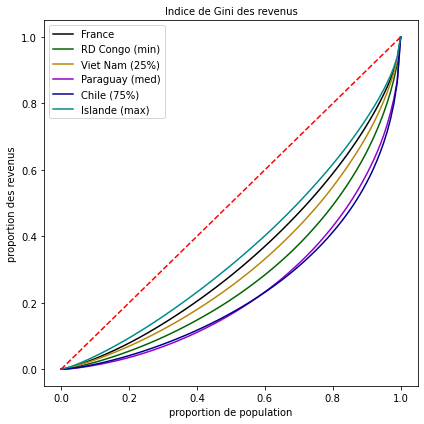

In [48]:
# Calculs des données des courbes de Lorenz
income_fra = incm_fra['income'].values
lorenz_fra = np.cumsum(np.sort(income_fra)) / income_fra.sum()
lorenz_fra = np.append([0], lorenz_fra)

income_con = incm_con['income'].values
lorenz_con = np.cumsum(np.sort(income_con)) / income_con.sum()
lorenz_con = np.append([0], lorenz_con)

income_vie = incm_vie['income'].values
lorenz_vie = np.cumsum(np.sort(income_vie)) / income_vie.sum()
lorenz_vie = np.append([0], lorenz_vie)

income_par = incm_par['income'].values
lorenz_par = np.cumsum(np.sort(income_par)) / income_par.sum()
lorenz_par = np.append([0], lorenz_par)

income_chi = incm_chi['income'].values
lorenz_chi = np.cumsum(np.sort(income_chi)) / income_chi.sum()
lorenz_chi = np.append([0], lorenz_chi)

income_ice = incm_ice['income'].values
lorenz_ice = np.cumsum(np.sort(income_ice)) / income_ice.sum()
lorenz_ice = np.append([0], lorenz_ice)

# Paramètres généraux
plt.figure(figsize=(6,6))

# Paramètres des courbes de Lorenz
plt.plot(np.linspace(0,1,len(lorenz_fra)),lorenz_fra, color='black')
plt.plot(np.linspace(0,1,len(lorenz_con)),lorenz_con, color='darkgreen')
plt.plot(np.linspace(0,1,len(lorenz_vie)),lorenz_vie, color='darkgoldenrod')
plt.plot(np.linspace(0,1,len(lorenz_par)),lorenz_par, color='darkviolet')
plt.plot(np.linspace(0,1,len(lorenz_chi)),lorenz_chi, color='darkblue')
plt.plot(np.linspace(0,1,len(lorenz_ice)),lorenz_ice, color='darkcyan')

# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'red', linestyle='--', label='Médiatrice')
# plt.text(0.5, 0.59, 'Médiatrice', fontsize=14, rotation = 45, color ='red')

# Métadonnées
plt.title('Indice de Gini des revenus', fontsize=10)
plt.ylabel('proportion des revenus', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('proportion de population', fontsize=10)
plt.xticks(fontsize=10)
plt.legend(label, prop={'size':10})
plt.tight_layout()


plt.show()

<a id='6'></a>
<h3 style='color:#8677b2'>Evolution des indices de Gini</h3>

[Haut de page](#sommaire)

In [49]:
# Chargement du fichier
gini_brut = pd.read_csv('gini.csv', skiprows=3, skipinitialspace=True, index_col=1)

# Mise en forme des données
gini_brut.reset_index(inplace=True)
gini_brut.rename(columns={'Country Name': 'Country'}, inplace =True)
gini_brut.drop(columns=['Country Code',
                      'Indicator Name',
                      'Indicator Code',
                       'Unnamed: 63'], inplace = True)
gini_brut.set_index('Country', inplace=True)
gini_brut = gini_brut.transform(lambda x: x / 100)

display(gini_brut.head())
display(gini_brut.tail())

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.29,NaN,NaN,NaN,NaN,NaN,NaN
Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.318,0.333,0.278,0.29,0.263,0.273,0.265,0.267,0.29,NaN
"Yémen, Rép. du",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.367,NaN,NaN,NaN,NaN
Afrique du Sud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.634,NaN,NaN,NaN,0.630,NaN,NaN,NaN,NaN
Zambie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.556,NaN,NaN,NaN,NaN,0.571,NaN,NaN,NaN
Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.432,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p style='color:#88cc8d;text-align:center'>
    Les données ont été téléchargées sur le site de la banque mondiale<br/>
    <a href="https://donnees.banquemondiale.org/indicateur/si.pov.gini?view=map">Source</a>
</p>

In [50]:
# Recherche de pays
liste_pays = gini_brut.index
for i in liste_pays:
    if 'congo' in i.lower():
        print(i)
    if 'chil' in i.lower():
        print(i)
    if 'land' in i.lower():
        print(i)

Chili
Congo, République démocratique du
Congo, République du
Finlande
Groenland
Irlande
Islande
Nouvelle-Zélande
Thaïlande


In [51]:
# Restriction des données sur les pays concernés
gini = gini_brut.loc[(gini_brut.index == 'France') |
                    (gini_brut.index == 'Congo, République démocratique du') |
                    (gini_brut.index == 'Viet Nam') |
                    (gini_brut.index == 'Paraguay') |
                     (gini_brut.index == 'Chili' )|
                    (gini_brut.index =='Islande')].T

# Nommage de l'index
gini.index.name = 'year'

gini.tail()

Country,Chili,"Congo, République démocratique du",France,Islande,Paraguay,Viet Nam
year,,,,,,
2014,NaN,NaN,0.323,0.278,0.507,0.348
2015,0.477,NaN,0.327,NaN,0.476,NaN
2016,NaN,NaN,NaN,NaN,0.479,0.353
2017,0.466,NaN,NaN,NaN,0.488,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Données disponibles pour la France
gini_fra = gini_brut.loc[gini_brut.index == 'France'].iloc[0:].dropna(axis=1)
# Données disponibles pour la République démocratique du Congo
gini_con = gini_brut.loc[gini_brut.index == 'Congo, République démocratique du'].iloc[0:].dropna(axis=1)
# Données disponibles pour le Viet Nam
gini_vie = gini_brut.loc[gini_brut.index == 'Viet Nam'].iloc[0:].dropna(axis=1)
# Données disponibles pour le Paraguay
gini_par = gini_brut.loc[gini_brut.index == 'Paraguay'].iloc[0:].dropna(axis=1)
# Données disponibles pour le Chili
gini_chi = gini_brut.loc[gini_brut.index == 'Chili'].iloc[0:].dropna(axis=1)
# Données disponibles pour l'Islande
gini_ice = gini_brut.loc[gini_brut.index == 'Islande'].iloc[0:].dropna(axis=1)


display(gini_fra)
display(gini_con)
display(gini_vie)
display(gini_par)
display(gini_chi)
display(gini_ice)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,
France,0.314,0.306,0.298,0.297,0.324,0.33,0.327,0.337,0.333,0.331,0.325,0.323,0.327


year,2004,2012
Country,,
"Congo, République démocratique du",0.422,0.421


year,1992,1998,2002,2004,2006,2008,2010,2012,2014,2016
Country,,,,,,,,,,
Viet Nam,0.357,0.354,0.37,0.368,0.358,0.356,0.393,0.356,0.348,0.353


year,1990,1995,1997,1999,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Paraguay,0.408,0.582,0.549,0.546,0.546,0.573,0.549,0.523,0.514,0.53,...,0.507,0.491,0.51,0.523,0.476,0.479,0.507,0.476,0.479,0.488


year,1987,1990,1992,1994,1996,1998,2000,2003,2006,2009,2011,2013,2015,2017
Country,,,,,,,,,,,,,,
Chili,0.562,0.572,0.548,0.564,0.549,0.555,0.528,0.515,0.482,0.49,0.476,0.473,0.477,0.466


year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,,,
Islande,0.268,0.28,0.29,0.302,0.295,0.318,0.287,0.262,0.268,0.268,0.254,0.278


2022-03-09 08:57:16,030 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-03-09 08:57:16,030 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-03-09 08:57:16,038 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-03-09 08:57:16,039 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-03-09 08:57:16,039 - INFO     - Using categorical units to plot a list of strings that 

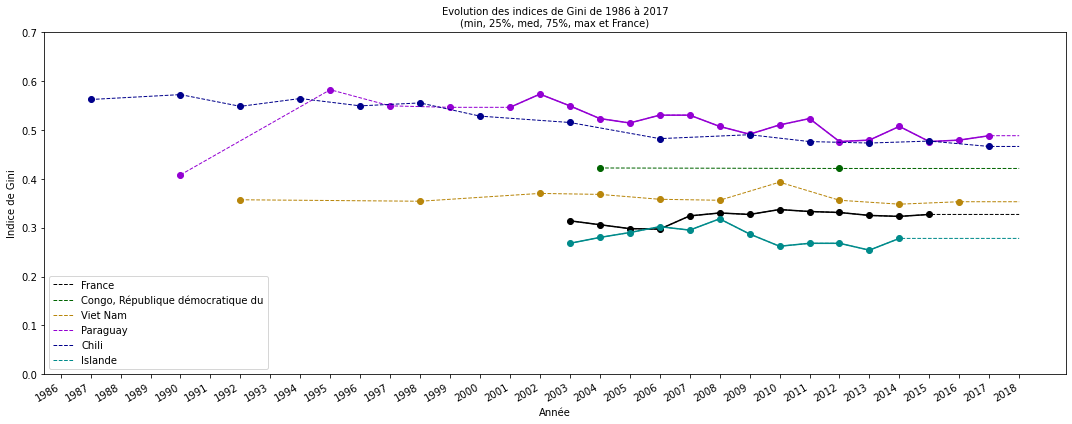

In [53]:
# Paramètre généraux
fig, ax = plt.subplots(figsize=(15,6))

# Paramètres des courbes
line, = ax.plot(gini['France'].interpolate(method='linear'),
                ls = '--', lw = 1, color='Black', label='France')
ax.plot(gini['France'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Congo, République démocratique du'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkgreen', label='Congo, République démocratique du')
ax.plot(gini['Congo, République démocratique du'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Viet Nam'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkgoldenrod', label='Viet Nam')
ax.plot(gini['Viet Nam'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Paraguay'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkviolet', label='Paraguay')
ax.plot(gini['Paraguay'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Chili'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkblue', label='Chili')
ax.plot(gini['Chili'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Islande'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkcyan', label='Islande')
ax.plot(gini['Islande'], color=line.get_color(), lw=1.5, marker = 'o')


# Métadonnées
plt.title('Evolution des indices de Gini de 1986 à 2017\n(min, 25%, med, 75%, max et France)', fontsize=10)
plt.xlabel('Année', fontsize=10)
plt.xticks(rotation=30, horizontalalignment='right')
plt.ylabel('Indice de Gini', fontsize = 10)
plt.ylim(0,0.7)
plt.legend(fontsize=10)
plt.tight_layout()


plt.show()

<a id='7'></a>
<h3 style='color:#8677b2'>Calcul de l'indice de Gini à partir du fichier de la World Income Distribution</h3>

[Haut de page](#sommaire)

In [54]:
# Liste des pays
key = df_income_pay_pop['Pays'].drop_duplicates().values

# Création colonne vide
df_income_pay_pop['Gini'] = 0

# Calcul de l'indice de Gini pour chaque pays et remplissage de la colonne Gini
for i in key:
    income1 = df_income_pay_pop.loc[df_income_pay_pop['Pays'] == i].income.values
    lorenz = np.cumsum(np.sort(income1)) / income1.sum()
    lorenz = np.append([0], lorenz)
    df_income_pay_pop.loc[df_income_pay_pop['Pays'] == i, 'Gini'] = 2 * (0.5 - (lorenz[:-1].sum() / len(lorenz)))
    
print(df_income_pay_pop.shape)
df_income_pay_pop.head()

(11600, 7)


,Pays,quantile,income,gdpppp,ISO3,Population,Gini
0,Albania,1,728.89795,7297.0,ALB,2947314.0,0.32141
1,Albania,2,916.66235,7297.0,ALB,2947314.0,0.32141
2,Albania,3,1010.91600,7297.0,ALB,2947314.0,0.32141
3,Albania,4,1086.90780,7297.0,ALB,2947314.0,0.32141
4,Albania,5,1132.69970,7297.0,ALB,2947314.0,0.32141


In [55]:
# Sélection des pays suivis
comp_gini = df_income_pay_pop.loc[(df_income_pay_pop['Pays'] == 'France') |
             (df_income_pay_pop['Pays'] == 'Congo Democratic Republic of the') |
             (df_income_pay_pop['Pays'] == 'Viet Nam') |
             (df_income_pay_pop['Pays'] == 'Paraguay') |
             (df_income_pay_pop['Pays'] == 'Chile') |
             (df_income_pay_pop['Pays'] == 'Iceland')].groupby('Pays').mean()

comp_gini

,quantile,income,gdpppp,Population,Gini
Pays,,,,,
Chile,50.5,7051.609966,13390.00000,16661942.0,0.546115
Congo Democratic Republic of the,50.5,276.016044,303.19305,60373608.0,0.459403
France,50.5,18309.407545,30357.00000,64374989.0,0.345640
Iceland,50.5,26888.511518,36527.00000,317414.0,0.302046
Paraguay,50.5,3278.080965,4347.00000,6047117.0,0.539729
Viet Nam,50.5,1377.773966,2578.00000,86707801.0,0.393546


In [56]:
# Ajout des coefficients téléchargés sur le site de la banque mondiale
comp_gini['gini2'] = gini_brut[(gini_brut.index == 'France') |
          (gini_brut.index == 'Congo, République démocratique du') |
         (gini_brut.index == 'Viet Nam') |
         (gini_brut.index == 'Paraguay') |
         (gini_brut.index == 'Chili') |
         (gini_brut.index == 'Islande')]['2008'].values

# La valeur de 2009 est choisie pour le Chili
comp_gini.loc[comp_gini.index == 'Chile', 'gini2'] = gini_brut[gini_brut.index == 'Chili']['2009'].values

comp_gini['Différence de Gini'] = comp_gini['Gini'] - comp_gini['gini2']
comp_gini

,quantile,income,gdpppp,Population,Gini,gini2,Différence de Gini
Pays,,,,,,,
Chile,50.5,7051.609966,13390.00000,16661942.0,0.546115,0.490,0.056115
Congo Democratic Republic of the,50.5,276.016044,303.19305,60373608.0,0.459403,NaN,NaN
France,50.5,18309.407545,30357.00000,64374989.0,0.345640,0.330,0.015640
Iceland,50.5,26888.511518,36527.00000,317414.0,0.302046,0.318,-0.015954
Paraguay,50.5,3278.080965,4347.00000,6047117.0,0.539729,0.507,0.032729
Viet Nam,50.5,1377.773966,2578.00000,86707801.0,0.393546,0.356,0.037546


<a id='8'></a>
<h3 style='color:#8677b2'>Classement par indice de Gini</h3>

[Haut de page](#sommaire)

In [57]:
# Classement selon l'indice de Gini
df_income_pay_pop_gini = df_income_pay_pop.groupby(by='Pays').mean()
rank_gini = df_income_pay_pop_gini.sort_values(by='Gini', ascending=False)
rank_gini.reset_index(inplace=True)

# Les 5 pays avec le plus haut indice de Gini
max_five_gini = rank_gini.head()


max_five_gini


,Pays,quantile,income,gdpppp,Population,Gini
0,South Africa,50.5,5617.904880,9602.0,50412129.0,0.682949
1,Honduras,50.5,3296.268419,3628.0,7872658.0,0.615512
2,Colombia,50.5,3547.005276,8185.0,44901544.0,0.583437
3,Guatemala,50.5,2142.474753,4367.0,14006366.0,0.582468
4,Central African Republic,50.5,811.299901,685.0,4345386.0,0.575972


In [58]:
# Moyenne de l'indice de Gini des 5 plus forts indices
max_five_gini['Gini'].mean()

0.6080675959510912

In [59]:
# Les 5 pays avec le plus faible indice de Gini
min_five_gini = rank_gini.tail()

min_five_gini

,Pays,quantile,income,gdpppp,Population,Gini
111,Ukraine,50.5,3349.388306,6721.0,46258200.0,0.272415
112,Sweden,50.5,16184.222707,34371.0,9219637.0,0.272166
113,Czech Republic,50.5,8235.293411,23223.0,10384603.0,0.270162
114,Slovakia,50.5,6096.579894,20515.0,5379233.0,0.264573
115,Slovenia,50.5,12106.007475,27197.0,2021316.0,0.248249


In [60]:
# Moyenne de l'indice de Gini des 5 plus faible indices
min_five_gini['Gini'].mean()

0.2655131057240497

In [61]:
# Position de la France (77 ème)
rank_gini.loc[rank_gini['Pays'] == 'France']

,Pays,quantile,income,gdpppp,Population,Gini
76,France,50.5,18309.407545,30357.0,64374989.0,0.34564


<a id='m3'></a>

<a id='m3'></a>
## Mission 3

<a id='9'></a>
<h3 style='color:#8677b2'>Ajout du coefficient d'élasticité</h3>

[Haut de page](#sommaire)

In [62]:
# Chargement du fichier de la banque mondiale
gdim = pd.read_csv('gdim.csv')

# Projection sur les colonnes utiles
gdima = gdim[['countryname', 'iso3', 'region', 'incgroup4', 'year', 'IGEincome']]

# Copie du dataframe initial
gdimb = gdima.copy()

# Création d'une colonne regroupant l'appelation 'region' et 'incgroup4'
gdimb['Group'] = gdimb[['region', 'incgroup4']].apply(lambda x: ', '.join(x), axis=1)

gdimb.head()

,countryname,iso3,region,incgroup4,year,IGEincome,Group
0,Afghanistan,AFG,South Asia,Low income,1980,NaN,"South Asia, Low income"
1,Afghanistan,AFG,South Asia,Low income,1980,NaN,"South Asia, Low income"
2,Afghanistan,AFG,South Asia,Low income,1980,NaN,"South Asia, Low income"
3,Afghanistan,AFG,South Asia,Low income,1980,NaN,"South Asia, Low income"
4,Afghanistan,AFG,South Asia,Low income,1980,NaN,"South Asia, Low income"


In [63]:
dtale.show(gdimb)

In [64]:
# Calcul des 'IGEincome'  moyen par région et groupe de revenus
frt6 = gdimb.groupby(['region', 'incgroup4', 'Group']).mean()[['IGEincome']]
frt6.reset_index(inplace=True)
frt6.set_index('Group', inplace=True)

frt6

,region,incgroup4,IGEincome
Group,,,
"East Asia & Pacific, Lower middle income",East Asia & Pacific,Lower middle income,0.527665
"East Asia & Pacific, Upper middle income",East Asia & Pacific,Upper middle income,0.469500
"Europe & Central Asia, Lower middle income",Europe & Central Asia,Lower middle income,0.424817
"Europe & Central Asia, Upper middle income",Europe & Central Asia,Upper middle income,0.477171
"High income, High income",High income,High income,0.348050
"Latin America & Caribbean, Lower middle income",Latin America & Caribbean,Lower middle income,0.940737
"Latin America & Caribbean, Upper middle income",Latin America & Caribbean,Upper middle income,0.878852
"Middle East & North Africa, Lower middle income",Middle East & North Africa,Lower middle income,0.916461
"Middle East & North Africa, Upper middle income",Middle East & North Africa,Upper middle income,0.517397


In [65]:
# Affectation de la valeur moyenne du fichier elasticity.txt pour la zone 'Asie'  - 'Base case'
gdimb.loc[(gdimb['region'] == 'South Asia') &
          (gdimb['incgroup4'] == 'Upper middle income'), 'IGEincome'] = 0.5

In [66]:
# Vérification des années existantes pour l'IGEincome
frt4 = gdimb.groupby(by='year').nunique()
frt4

,countryname,iso3,region,incgroup4,IGEincome,Group
year,,,,,,
1940,107,107,7,4,0,14
1950,110,110,7,4,0,14
1960,114,114,7,4,38,14
1970,111,111,7,4,36,14
1980,147,147,7,4,2,15


In [67]:
# Création d'un dataframe avec les 'IGEincome' en colonnes
gdimc = pd.pivot_table(gdimb, values='IGEincome', index={'countryname'}, columns='year', dropna=False)
gdimc.reset_index(inplace=True)
gdimc.set_index('countryname', inplace=True)

gdimc.head()


year,1940,1950,1960,1970,1980
countryname,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,0.815874,NaN
Angola,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN
Armenia,NaN,NaN,NaN,NaN,NaN


In [68]:
# Jointure et mise en forme du dataframe  
gdimd = pd.merge(gdimb, gdimc, on='countryname')
gdimd.drop(columns=['year', 'IGEincome'], inplace=True)
gdimd.set_index('countryname', inplace=True)

gdimd.head()

,iso3,region,incgroup4,Group,1940,1950,1960,1970,1980
countryname,,,,,,,,,
Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",NaN,NaN,NaN,NaN,NaN


In [69]:
# Vérification des valeurs nulles
gdimd.isnull().sum()

iso3            0
region          0
incgroup4       0
Group           0
1940         6504
1950         6504
1960         4420
1970         4442
1980         6432
dtype: int64

In [70]:
# Vérification de l'existence d'un seul coefficient d'elasticité par pays
frt2 = gdimd.groupby(by='countryname').nunique()
frt2

,iso3,region,incgroup4,Group,1940,1950,1960,1970,1980
countryname,,,,,,,,,
Afghanistan,1,1,1,1,0,0,0,0,0
Albania,1,1,1,1,0,0,0,1,0
Angola,1,1,1,1,0,0,0,0,0
Argentina,1,1,1,1,0,0,0,0,0
Armenia,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",1,1,1,1,0,0,0,0,0
Vietnam,1,1,1,1,0,0,1,0,0
West Bank and Gaza,1,1,1,1,0,0,0,0,0


In [71]:
frt2['test_annee'] = frt2[1940] + frt2[1950] + frt2[1960] + frt2[1970] + frt2[1980]
frt2.loc[frt2['test_annee'] > 0]

,iso3,region,incgroup4,Group,1940,1950,1960,1970,1980,test_annee
countryname,,,,,,,,,,
Albania,1,1,1,1,0,0,0,1,0,1
Australia,1,1,1,1,0,0,1,0,0,1
Austria,1,1,1,1,0,0,1,0,0,1
Bangladesh,1,1,1,1,0,0,1,0,0,1
Belarus,1,1,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
Uganda,1,1,1,1,0,0,0,1,0,1
United Kingdom,1,1,1,1,0,0,1,0,0,1
United States,1,1,1,1,0,0,1,0,0,1


In [72]:
# Nombre de pays sans coefficient d'élasticité
len(frt2.loc[frt2['test_annee'] == 0])

74

In [73]:
# Aggrégation par pays selon la moyenne
gdime = gdimd.groupby(by=['countryname', 'iso3', 'region', 'incgroup4', 'Group']).mean()
gdime.reset_index(inplace=True)
gdime.set_index('countryname', inplace = True)

# Remplacement des 'NaN' par une string 'DM' (Données manquantes)
gdime.fillna('DM', inplace=True) 

gdime.head(3)

,iso3,region,incgroup4,Group,1940,1950,1960,1970,1980
countryname,,,,,,,,,
Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",DM,DM,DM,DM,DM
Albania,ALB,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",DM,DM,DM,0.815874,DM
Angola,AGO,Sub-Saharan Africa,Upper middle income,"Sub-Saharan Africa, Upper middle income",DM,DM,DM,DM,DM


In [74]:
# Création d'une clef pour itérer
key1 = gdime.index
key1

Index(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela, RB', 'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.',
       'Zambia'],
      dtype='object', name='countryname', length=150)

In [75]:
for i in key1:
    if gdime.loc[i, 1980] != 'DM':
        gdime.loc[i, [1940, 1950, 1960, 1970]] = gdime.loc[i, 1980] # Si il existe une valeur en 1980
                                                                    #elle est propagée
    elif gdime.loc[i, 1970] != 'DM':
        gdime.loc[i, [1940, 1950, 1960, 1980]] = gdime.loc[i, 1970] # Sinon, si il existe une valeur en 1970
                                                                    # Elle est propagée
    
    elif gdime.loc[i, 1960] != 'DM':
        gdime.loc[i, [1940, 1950, 1970, 1980]] = gdime.loc[i, 1960] # Sinon, si il existe une valeur en 1960
                                                                    #elle est propagée
    
    elif [(gdime.loc[i, 1980] == 'DM') &
              (gdime.loc[i, 1970] == 'DM') &
              (gdime.loc[i, 1960] == 'DM') &
              (gdime.loc[i, 1950] == 'DM') &
              (gdime.loc[i, 1940] == 'DM')]: # Si il n'y a aucune valeur
                                               # On choisi la valeur moyenne de la région
                                               #du niveau de revenu
                k = gdime.loc[i, 'Group']
                gdime.loc[i, [1940,  1950, 1960, 1970, 1980]] = frt6.loc[k, 'IGEincome']

In [76]:
gdime.isnull().sum()

iso3         0
region       0
incgroup4    0
Group        0
1940         0
1950         0
1960         0
1970         0
1980         0
dtype: int64

In [77]:
# # Assignation du type float pour les colonnes contenant les IGEincome
# gdime.loc[:,[1940, 1950, 1960, 1970, 1980]] = gdime.loc[:,[1940, 1950, 1960, 1970, 1980]].to_numeric(float)
# gdime.dtypes

In [78]:
# gdime.loc[:,1940] = pd.to_numeric(gdime.loc[:,1940],errors = 'coerce')
# gdime.loc[:,1950] = pd.to_numeric(gdime.loc[:,1950],errors = 'coerce')
# gdime.loc[:,1960] = pd.to_numeric(gdime.loc[:,1960],errors = 'coerce')
# gdime.loc[:,1970] = pd.to_numeric(gdime.loc[:,1970],errors = 'coerce')
# gdime.loc[:,1980] = pd.to_numeric(gdime.loc[:,1980],errors = 'coerce')

# gdime.dtypes

# Assignation du type float pour les colonnes contenant les IGEincome
gdime[[1940, 1950, 1960, 1970, 1980]] = gdime[[1940, 1950, 1960, 1970, 1980]].astype(float)

gdime.dtypes

iso3          object
region        object
incgroup4     object
Group         object
1940         float64
1950         float64
1960         float64
1970         float64
1980         float64
dtype: object

In [79]:
gdime.reset_index(inplace=True)
gdime.head(3)

,countryname,iso3,region,incgroup4,Group,1940,1950,1960,1970,1980
0,Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",0.436000,0.436000,0.436000,0.436000,0.436000
1,Albania,ALB,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874,0.815874,0.815874,0.815874,0.815874
2,Angola,AGO,Sub-Saharan Africa,Upper middle income,"Sub-Saharan Africa, Upper middle income",0.677000,0.677000,0.677000,0.677000,0.677000


In [80]:
# Mise en forme du dataframe
gdimf = gdime.drop(columns=[1940,1950,1960,1970]).rename(columns={'countryname': 'pays',
                                                                  'iso3': 'ISO3',
                                                                  1980: 'Coef Elas'})
gdimf.reset_index(inplace=True, drop=True)

gdimf.head(3)

,pays,ISO3,region,incgroup4,Group,Coef Elas
0,Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",0.436000
1,Albania,ALB,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
2,Angola,AGO,Sub-Saharan Africa,Upper middle income,"Sub-Saharan Africa, Upper middle income",0.677000


In [81]:
# Vérification des valeurs moyennes par région et niveau de revenus
gdimf.groupby(by='Group').mean()

,Coef Elas
Group,
"East Asia & Pacific, Lower middle income",0.527665
"East Asia & Pacific, Upper middle income",0.469500
"Europe & Central Asia, Lower middle income",0.424817
"Europe & Central Asia, Upper middle income",0.477171
"High income, High income",0.346502
"Latin America & Caribbean, Lower middle income",0.940737
"Latin America & Caribbean, Upper middle income",0.878852
"Middle East & North Africa, Lower middle income",0.916461
"Middle East & North Africa, Upper middle income",0.517397


In [82]:
# Recherche des codes pays communs aux deux fichiers
pays_gdim = gdimf.ISO3.unique()
pays = df_income_pay_pop.ISO3.unique()
ctrl = np.intersect1d(pays, pays_gdim)

len(ctrl)

114

In [83]:
# Jointure de wid_fin1 et gdime
ready_db = pd.merge(df_income_pay_pop, gdimf, how='left', on='ISO3' )

# Suppression des colonnes inutiles
ready_db.drop(columns=['pays'], inplace=True)

ready_db.head()

,Pays,quantile,income,gdpppp,ISO3,Population,Gini,region,incgroup4,Group,Coef Elas
0,Albania,1,728.89795,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
1,Albania,2,916.66235,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
2,Albania,3,1010.91600,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
3,Albania,4,1086.90780,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
4,Albania,5,1132.69970,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874


<AxesSubplot:>

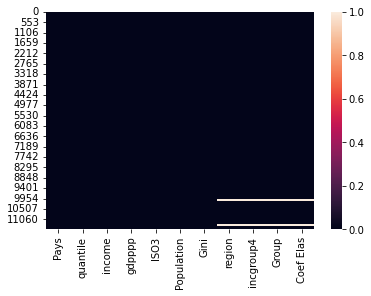

In [84]:
# Recherche des valleurs nulles ou manquantes
sns.heatmap(ready_db.isnull())

In [85]:

ready_db.isnull().sum()

Pays            0
quantile        0
income          0
gdpppp          0
ISO3            0
Population      0
Gini            0
region        200
incgroup4     200
Group         200
Coef Elas     200
dtype: int64

In [86]:
# Affichage des lignes incomplètes
ready_db.loc[ready_db['region'].isnull()].groupby(by=['Pays', 'ISO3']).nunique()

,,quantile,income,gdpppp,Population,Gini,region,incgroup4,Group,Coef Elas
Pays,ISO3,,,,,,,,,
Kosovo,XKX,100,100,1,1,1,0,0,0,0
Syrian Arab Republic (Syria),SYR,100,100,1,1,1,0,0,0,0


<p style='color:#88cc8d;text-align:center'>
    Les données proviennent de la version anglaise du site de la FAO<br/>
    <a href="http://www.fao.org/faostat/fr/#data">Source</a>
</p>

In [87]:
# Recherche de ces pays dans gdim
for i in pays_gdim:
    if 'k' in i.lower():
        print(i)
    elif 'sy' in i.lower():
        print(i)
    elif 'sr' in i.lower():
        print(i)

KHM
DNK
ISR
KAZ
KEN
KIR
KOR
KSV
KGZ
MKD
PAK
SRB
SVK
LKA
TJK
UKR


In [88]:
# Affichage des valeurs retrouvées manuellement
gdimf.loc[gdimf['ISO3'] == 'KSV']

,pays,ISO3,region,incgroup4,Group,Coef Elas
71,Kosovo,KSV,Europe & Central Asia,Lower middle income,"Europe & Central Asia, Lower middle income",0.424817


In [89]:
# Saisie manuelle
ready_db.loc[ready_db['Pays'] == 'Kosovo', ['region', 'incgroup4', 'Group', 'Coef Elas']] =\
['Europe & Central Asia', 'Lower middle income', 'Europe & Central Asia, Lower middle income', 0.424817]

ready_db.loc[ready_db['Pays'] == 'Kosovo'].head(1)

,Pays,quantile,income,gdpppp,ISO3,Population,Gini,region,incgroup4,Group,Coef Elas
11300,Kosovo,1,437.8937,7530.632,XKX,1747400.0,0.331163,Europe & Central Asia,Lower middle income,"Europe & Central Asia, Lower middle income",0.424817


In [90]:
#Affichage des informations sur la Syrie
ready_db.loc[ready_db['Pays'] == 'Syrian Arab Republic (Syria)'].groupby(['Pays']).mean()

,quantile,income,gdpppp,Population,Gini,Coef Elas
Pays,,,,,,
Syrian Arab Republic (Syria),50.5,685.817495,4512.0,20325443.0,0.373873,NaN


In [91]:
# Restriction sur les pays du même Group
inter = ready_db.loc[ready_db['Group'] == 'Middle East & North Africa, Lower middle income'].groupby('Pays').mean()
inter.reset_index(inplace=True)

# Restriction sur les pays de la même région
inter

,Pays,quantile,income,gdpppp,Population,Gini,Coef Elas
0,Egypt,50.5,1969.577399,5011.00,80953881.0,0.347097,0.943205
1,Morocco,50.5,2337.600601,3973.00,31596855.0,0.422964,0.945744
2,Palestinian Territory Occupied,50.5,1114.098514,3612.14,3596688.0,0.371354,0.916461
3,Yemen,50.5,1042.635870,2224.00,22356391.0,0.390259,0.916461


In [92]:
# Calcul du Coef. d'Elas moyen des pays similaires
coef_elas_moy_syr = inter['Coef Elas'].mean()

In [93]:
# Affectation manuelle
ready_db.loc[ready_db['Pays'] == 'Syrian Arab Republic (Syria)',
             ['region',
              'incgroup4',
              'Group',
              'Coef Elas']] = ['Middle East & North Africa',
                               'Upper middle income',
                               'Middle East & North Africa, Upper middle income',
                               coef_elas_moy_syr]

ready_db.loc[ready_db['Pays'] == 'Syrian Arab Republic (Syria)'].head(3)

,Pays,quantile,income,gdpppp,ISO3,Population,Gini,region,incgroup4,Group,Coef Elas
10000,Syrian Arab Republic (Syria),1,143.18066,4512.0,SYR,20325443.0,0.373873,Middle East & North Africa,Upper middle income,"Middle East & North Africa, Upper middle income",0.930468
10001,Syrian Arab Republic (Syria),2,179.06183,4512.0,SYR,20325443.0,0.373873,Middle East & North Africa,Upper middle income,"Middle East & North Africa, Upper middle income",0.930468
10002,Syrian Arab Republic (Syria),3,195.83022,4512.0,SYR,20325443.0,0.373873,Middle East & North Africa,Upper middle income,"Middle East & North Africa, Upper middle income",0.930468


In [94]:
# Vérification des valeurs nulles
ready_db.isnull().sum()

Pays          0
quantile      0
income        0
gdpppp        0
ISO3          0
Population    0
Gini          0
region        0
incgroup4     0
Group         0
Coef Elas     0
dtype: int64

In [95]:
print(ready_db.shape)
ready_db.head(3)

(11600, 11)


,Pays,quantile,income,gdpppp,ISO3,Population,Gini,region,incgroup4,Group,Coef Elas
0,Albania,1,728.89795,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
1,Albania,2,916.66235,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
2,Albania,3,1010.91600,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874


<a id='10'></a>
<h3 style='color:#8677b2'>Distribution condition conditionnelles</h3>

[Haut de page](#sommaire)

In [96]:
#  Définition des paramètres
nb_quantiles = 10
n = 1000 * nb_quantiles
pj = 0.9

# # Génération selon la loi Normale
# ln_y_parent = st.norm(0,1).rvs(size=n)
# residus = st.norm(0,1).rvs(size=n)

# # Calcul des revenus des parents et des enfants
# y_child = np.exp(pj * ln_y_parent + residus)
# y_parents = np.exp(ln_y_parent)

# # Conversion des tableaux en series
# y_child = pd.Series(y_child)
# y_parents = pd.Series(y_parents)



In [97]:
# def generate_incomes(n, pj):
#     # On génère les revenus des parents (exprimés en logs) selon une loi normale.
#     # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
#     ln_y_parent = st.norm(0,1).rvs(size=n)
#     # Génération d'une réalisation du terme d'erreur epsilon
#     residues = st.norm(0,1).rvs(size=n)
#     return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)
y_child,y_parents =  generate_incomes(n, pj)

# Conversion des tableaux en series
y_child = pd.Series(y_child)
y_parents = pd.Series(y_parents)

In [98]:
# def quantiles(l, nb_quantiles):
#     size = len(l)
#     l_sorted = l.copy()
#     l_sorted = l_sorted.sort_values()
#     quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
#     q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
#     return pd.Series([q_dict[e] for e in l])

# Détermination de la classe de revenus des enfants et des parents
c_i_child = quantiles(y_child, nb_quantiles)
c_i_parent = quantiles(y_parents, nb_quantiles)

In [99]:
c_i_child

0       8
1       5
2       6
3       1
4       5
       ..
9995    9
9996    1
9997    9
9998    9
9999    2
Length: 10000, dtype: int64

In [100]:
# Mise en forme
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
sample

,y_child,y_parents,c_i_child,c_i_parent
0,2.608116,1.216732,8,6
1,0.845529,0.725329,5,4
2,0.980706,1.453047,6,7
3,0.132467,0.444419,1,3
4,0.776179,2.498023,5,9
...,...,...,...,...
9995,3.165631,1.296446,9,7
9996,0.127865,1.143481,1,6
9997,3.829699,2.275018,9,9
9998,4.620018,5.118496,9,10


In [101]:
cd = conditional_distributions(sample, nb_quantiles)
cd

array([[0.422, 0.231, 0.125, 0.097, 0.049, 0.046, 0.019, 0.004, 0.007,
        0.   ],
       [0.209, 0.211, 0.159, 0.135, 0.105, 0.08 , 0.045, 0.03 , 0.018,
        0.008],
       [0.137, 0.144, 0.182, 0.137, 0.132, 0.097, 0.08 , 0.05 , 0.029,
        0.012],
       [0.094, 0.138, 0.136, 0.158, 0.138, 0.098, 0.094, 0.073, 0.053,
        0.018],
       [0.067, 0.108, 0.131, 0.133, 0.127, 0.138, 0.1  , 0.1  , 0.076,
        0.02 ],
       [0.038, 0.071, 0.1  , 0.108, 0.118, 0.139, 0.136, 0.13 , 0.105,
        0.055],
       [0.02 , 0.051, 0.072, 0.093, 0.109, 0.138, 0.161, 0.144, 0.13 ,
        0.082],
       [0.008, 0.024, 0.05 , 0.078, 0.098, 0.114, 0.14 , 0.167, 0.177,
        0.144],
       [0.002, 0.017, 0.036, 0.047, 0.092, 0.092, 0.127, 0.156, 0.205,
        0.226],
       [0.003, 0.005, 0.009, 0.014, 0.032, 0.058, 0.098, 0.146, 0.2  ,
        0.435]])

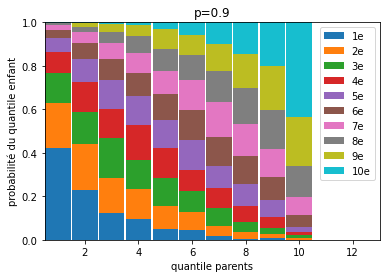

In [102]:
# Graphique pour une faible mobilité

cumul = np.array([0] * nb_quantiles)
    
for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)
plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
plt.title("p=" + str(pj))
plt.legend()
plt.xlabel("quantile parents")
plt.ylabel("probabilité du quantile enfant")
plt.show()

In [103]:
# Sachant que la classe de revenus d'un enfant est 1 et Coef Elas est 0.9 (faible mobilité)
# Alors la probabilité que la classe de revenus du parent soit 0 est:
c_i_child = 0
c_i_parent = 0
p = proba_cond(c_i_parent, c_i_child, cd)
print('\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent+1, c_i_child+1, pj, p))


P(c_i_parent = 1 | c_i_child = 1, pj = 0.9) = 0.422


In [104]:
# Sachant que la classe de revenus d'un enfant est 1 et Coef Elas est 0.9 (faible mobilité)
# Alors la probabilité que la classe de revenus du parent soit 10 est:
c_i_child = 0
c_i_parent = 9
p = proba_cond(c_i_parent, c_i_child, cd)
print('\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent+1, c_i_child+1, pj, p))


P(c_i_parent = 10 | c_i_child = 1, pj = 0.9) = 0.0


In [105]:
#plot_conditional_distributions(p2, cd, nb_quantiles)

In [106]:
# Définition de nouveaux paramètres pour une forte mobilité
pj_forte = 0.1

y_child_forte, y_parents_forte = generate_incomes(n, pj_forte)
sample_forte = compute_quantiles(y_child_forte, y_parents_forte, nb_quantiles)
cd_forte = conditional_distributions(sample_forte, nb_quantiles)
cd_forte

array([[0.135, 0.12 , 0.103, 0.103, 0.099, 0.101, 0.089, 0.103, 0.087,
        0.06 ],
       [0.115, 0.109, 0.117, 0.1  , 0.078, 0.103, 0.109, 0.081, 0.096,
        0.092],
       [0.112, 0.104, 0.102, 0.088, 0.102, 0.11 , 0.091, 0.106, 0.092,
        0.093],
       [0.085, 0.103, 0.097, 0.116, 0.109, 0.095, 0.107, 0.112, 0.095,
        0.081],
       [0.106, 0.103, 0.094, 0.103, 0.107, 0.118, 0.088, 0.103, 0.089,
        0.089],
       [0.12 , 0.086, 0.102, 0.109, 0.096, 0.094, 0.104, 0.098, 0.104,
        0.087],
       [0.088, 0.092, 0.1  , 0.115, 0.095, 0.106, 0.11 , 0.101, 0.088,
        0.105],
       [0.089, 0.102, 0.102, 0.092, 0.106, 0.083, 0.084, 0.102, 0.109,
        0.131],
       [0.079, 0.092, 0.096, 0.097, 0.097, 0.097, 0.118, 0.093, 0.113,
        0.118],
       [0.071, 0.089, 0.087, 0.077, 0.111, 0.093, 0.1  , 0.101, 0.127,
        0.144]])

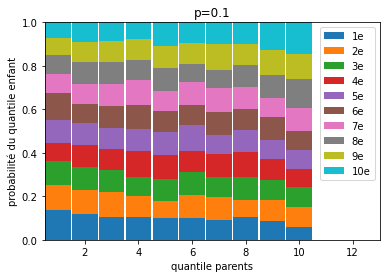

In [107]:
# Définition de nouveaux paramètres pour une forte mobilité

cumul = np.array([0] * nb_quantiles)
    
for i, child_quantile in enumerate(cd_forte):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)
plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
plt.title("p=" + "0.1")
plt.legend()
plt.xlabel("quantile parents")
plt.ylabel("probabilité du quantile enfant")
plt.show()

In [108]:
# Sachant que la classe de revenus d'un enfant est 1 et Coef Elas est 0.1 (forte mobilité)
# Alors la probabilité que la classe de revenus du parent soit 1 est:
c_i_child1 = 0
c_i_parent1 = 0
p1 = proba_cond(c_i_parent1, c_i_child1, cd_forte)
print('\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent1+1, c_i_child1+1, pj_forte, p1))


P(c_i_parent = 1 | c_i_child = 1, pj = 0.1) = 0.135


In [109]:
# Sachant que la classe de revenus d'un enfant est 1 et Coef Elas est 0.1 (forte mobilité)
# Alors la probabilité que la classe de revenus du parent soit 10 est:
c_i_child1 = 0
c_i_parent1 = 9
p1 = proba_cond(c_i_parent1, c_i_child1, cd_forte)
print('\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent1+1, c_i_child1+1, pj_forte, p1))


P(c_i_parent = 10 | c_i_child = 1, pj = 0.1) = 0.06


<a id='11'></a>
<h3 style='color:#8677b2'>Application du protocole sur nos données</h3>

[Haut de page](#sommaire)

In [110]:
# Clonage des lignes 
ready_db1 = pd.concat([ready_db] * 500)
ready_db1.sort_values(by=['Pays', 'quantile'], inplace=True)

In [111]:
ready_db1.shape

(5800000, 11)

In [112]:
# Mise en forme 
ready_db1.rename(columns={'quantile': 'c_i_child', 'income': 'y_child', 'Gini': 'Gj', 'Coef Elas': 'pj'}, inplace=True)
ready_db1 = ready_db1[['Pays', 'c_i_child', 'y_child', 'Gj', 'pj']]

ready_db1.head(3)

,Pays,c_i_child,y_child,Gj,pj
0,Albania,1,728.89795,0.32141,0.815874
0,Albania,1,728.89795,0.32141,0.815874
0,Albania,1,728.89795,0.32141,0.815874


In [113]:
n=100_000

# Préparation des données
nb_quantiles=100
key3 = ready_db1['Pays'].drop_duplicates().values
c_i_parent = []
ready_db1['c_i_parent'] = 0

# Pour chaque pays
for pays in key3:
    # Selection du pays
    y_child, y_parent = generate_incomes(n, ready_db1.loc[ready_db1['Pays'] == pays, 'pj'].iloc[0]) 
    # Création des quantiles
    sample = compute_quantiles(y_child, y_parent, nb_quantiles) 
    # Création de l'arrondi du nombre d'individus attendu en fonction des distributions conditionnelles
    cd = np.round(conditional_distributions(sample, nb_quantiles) * 500)
    # Typage en entier
    cd = np.array(cd, int)
    # Passage en dataframe
    cdd = pd.DataFrame(cd)
    # Création de la transposée
    cdt = cdd.T
    # Pour chaque c_i_child
    for cic in np.arange(100):
        # Création d'une liste d'index des valeurs supérieur à 5 grâce à la transposée
        list_random = cdt.loc[cdt[cic] > 5, cic].index.tolist()

        # Si la somme des individus par pays et c_i_child est inférieure à 500 individus
        if cdd.loc[cdd.index == cic].sum().sum() < 500:        
            # Calcul du nombre de valeurs manquantes
            diff = 500 - cdd.loc[cdd.index == cic].sum().sum()
            # Prélèvement d'index dans la liste des valeurs supérieures à 5 individus
            al_ind = random.sample(list_random, diff)
            # Ajout de 1 pour les individus prélévés
            cdd.loc[cdd.index == cic, al_ind] = cdd.loc[cdd.index == cic, al_ind] + 1

        # Si la somme des individus par pays et c_i_child est supérieure à 500 individus
        elif cdd.loc[cdd.index == cic].sum().sum() > 500:
            # Calcul du nombre de valeurs en trop
            diff = cdd.loc[cdd.index == cic].sum().sum() - 500
            # Prélèvement d'index dans la liste des valeurs supérieures à 5 individus
            al_ind = random.sample(list_random, diff)
            # Soustraction de 1 pour les individus prélévés
            cdd.loc[cdd.index == cic, al_ind] = cdd.loc[cdd.index == cic, al_ind] - 1

        # Pour chaque c_i_parent
        for cip in range(0,100):
            # On étend la liste c_i_parent de l'index + 1 de la valeur contenu en c_i_child, c_i_parent
            c_i_parent.extend(np.repeat(cip + 1, cdd.iloc[cic, cip], axis=0))
    # On affecte les valeurs de la liste c_i_parent à la colonne c_i_parent de notre dataframe principale
    ready_db1.loc[(ready_db1['Pays'] == pays), 'c_i_parent'] = c_i_parent
    # On reinitialise la liste c_i_parent
    c_i_parent =[]

In [114]:
# pays_list=big_data['country'].unique()
# classe_parent=0
# classe_enfant=0
# list_prob=[]

# for pays in pays_list:
#     pj=big_data.loc[big_data['country']==pays,'coeff_elas'].iloc[0]
#     nb_quantiles = 100 # nombre de quantiles (nombre de classes de revenu)
#     n = 50000 # taille de l'échantillon
#     y_child, y_parents = generate_incomes(n, pj)
#     sample = compute_quantiles(y_child, y_parents, nb_quantiles)
#     cd = conditional_distributions(sample, nb_quantiles)
#     for c_i_child in range(100):
#         for c_i_parent in range(100):
#             p = proba_cond(c_i_parent, c_i_child, cd)
#             #print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child,pj,p))
#             list_prob.extend([c_i_parent+1]*(int(p*500)))


In [115]:
display(ready_db1.head())
display(ready_db1.tail())

,Pays,c_i_child,y_child,Gj,pj,c_i_parent
0,Albania,1,728.89795,0.32141,0.815874,1
0,Albania,1,728.89795,0.32141,0.815874,1
0,Albania,1,728.89795,0.32141,0.815874,1
0,Albania,1,728.89795,0.32141,0.815874,1
0,Albania,1,728.89795,0.32141,0.815874,1


,Pays,c_i_child,y_child,Gj,pj,c_i_parent
11499,Yemen,100,9050.4375,0.390259,0.916461,100
11499,Yemen,100,9050.4375,0.390259,0.916461,100
11499,Yemen,100,9050.4375,0.390259,0.916461,100
11499,Yemen,100,9050.4375,0.390259,0.916461,100
11499,Yemen,100,9050.4375,0.390259,0.916461,100


In [116]:
# Suppression de la variable c_i_child inutile pour la mission 4
ready_db1.drop(columns='c_i_child', inplace=True)

In [117]:
# Création d'un dataframe avec la variable revenu moyen du pays
y_child_moy_df = ready_db1.groupby(by='Pays').mean()
y_child_moy_df.reset_index(inplace=True)
y_child_moy_df = y_child_moy_df[['Pays', 'y_child']]
y_child_moy_df.rename(columns={'y_child': 'mj'}, inplace=True)

y_child_moy_df.head(3)

,Pays,mj
0,Albania,2994.829902
1,Argentina,5847.884654
2,Armenia,1628.382785


In [118]:
# Ajout de la colonne y_child_moy
ready_db2 = pd.merge(ready_db1, y_child_moy_df, on='Pays')
ready_db2.head()

,Pays,y_child,Gj,pj,c_i_parent,mj
0,Albania,728.89795,0.32141,0.815874,1,2994.829902
1,Albania,728.89795,0.32141,0.815874,1,2994.829902
2,Albania,728.89795,0.32141,0.815874,1,2994.829902
3,Albania,728.89795,0.32141,0.815874,1,2994.829902
4,Albania,728.89795,0.32141,0.815874,1,2994.829902


In [119]:
ready_db2.groupby('Pays').count().shape

(116, 5)

<a id='m4'></a>
## Mission 4

<h3 >Mission: Créer un modèle permettant de déterminer le revenu potentiel d'une personne </h3> 
  

* Etude retrospective  
* Variable d'intérêt (dépendante, à expliquer): 'y_child' ou 'ln_y_child'  
* Facteur (variables indépendantes, explicatives): 'Pays', 'mj', 'ln_mj', 'Gj', 'c_i_parent'  
  
#### Description des variable:  
  
**y_child**: revenu  
**ln_y_child**: logarithme de y_child  
**Pays**: Pays d'appartenance d'un individus  
**mj**: revenu moyen par pays  
**ln_mj**: logarithme de mj  
**Gj**: Indice de Gini du pays  
**c_i_parent**: classe de revenu des parent

<a id='12'></a>
<h3 ><font>ANOVA de la variable revenus des enfants en fonction du pays</font></h3>

[Haut de page](#sommaire)

In [120]:
# Ajout des colonnes 'logarithmes'
ready_db2['ln_y_child'] = np.log(ready_db2['y_child'])
ready_db2['ln_mj'] = np.log(ready_db2['mj'])

ready_db2.tail(3)

,Pays,y_child,Gj,pj,c_i_parent,mj,ln_y_child,ln_mj
5799997,Yemen,9050.4375,0.390259,0.916461,100,1042.63587,9.110568,6.949507
5799998,Yemen,9050.4375,0.390259,0.916461,100,1042.63587,9.110568,6.949507
5799999,Yemen,9050.4375,0.390259,0.916461,100,1042.63587,9.110568,6.949507


In [121]:
dtale.show(ready_db2)

In [122]:
#Pour l'ensemble des tests, notre niveau de test sera:
alpha = 0.05

* Le pays d'origine a-t-il une influence sur le revenu?  

H0: Tous les pays ont le même revenu (tous les alpha_i sont nuls)  
Le pays n'a pas d'influence sur le revenu enfant moyen  
  
H1: Les revenus dépendent du pays (les alpha_i sont différents de 0)  
Le pays a une influence sur le revenu

In [123]:
# Agrégation pour gagner en temps de calculs
ready_db3 = ready_db2.groupby(by=['Pays',
                                  'y_child',
                                  'mj',
                                  'Gj',
                                  'pj',
                                  'ln_mj',
                                  'ln_y_child']).mean()
ready_db3.reset_index(inplace=True)
ready_db3.drop(columns=['c_i_parent'], inplace=True)

ready_db3.tail()

,Pays,y_child,mj,Gj,pj,ln_mj,ln_y_child
11595,Yemen,2568.6511,1042.63587,0.390259,0.916461,6.949507,7.851136
11596,Yemen,2893.9040,1042.63587,0.390259,0.916461,6.949507,7.970362
11597,Yemen,3307.2722,1042.63587,0.390259,0.916461,6.949507,8.103879
11598,Yemen,4137.0264,1042.63587,0.390259,0.916461,6.949507,8.327733
11599,Yemen,9050.4375,1042.63587,0.390259,0.916461,6.949507,9.110568


In [124]:
ready_db2.shape, ready_db3.shape

((5800000, 8), (11600, 7))

In [125]:
ready_db2[ready_db2['Pays'] == 'Yemen']

,Pays,y_child,Gj,pj,c_i_parent,mj,ln_y_child,ln_mj
5750000,Yemen,162.95131,0.390259,0.916461,1,1042.63587,5.093451,6.949507
5750001,Yemen,162.95131,0.390259,0.916461,1,1042.63587,5.093451,6.949507
5750002,Yemen,162.95131,0.390259,0.916461,1,1042.63587,5.093451,6.949507
5750003,Yemen,162.95131,0.390259,0.916461,1,1042.63587,5.093451,6.949507
5750004,Yemen,162.95131,0.390259,0.916461,1,1042.63587,5.093451,6.949507
...,...,...,...,...,...,...,...,...
5799995,Yemen,9050.43750,0.390259,0.916461,100,1042.63587,9.110568,6.949507
5799996,Yemen,9050.43750,0.390259,0.916461,100,1042.63587,9.110568,6.949507
5799997,Yemen,9050.43750,0.390259,0.916461,100,1042.63587,9.110568,6.949507
5799998,Yemen,9050.43750,0.390259,0.916461,100,1042.63587,9.110568,6.949507


In [126]:
ready_db3[ready_db3['Pays'] == 'Yemen']

,Pays,y_child,mj,Gj,pj,ln_mj,ln_y_child
11500,Yemen,162.95131,1042.63587,0.390259,0.916461,6.949507,5.093451
11501,Yemen,241.20471,1042.63587,0.390259,0.916461,6.949507,5.485646
11502,Yemen,274.72772,1042.63587,0.390259,0.916461,6.949507,5.615780
11503,Yemen,299.72230,1042.63587,0.390259,0.916461,6.949507,5.702856
11504,Yemen,319.84152,1042.63587,0.390259,0.916461,6.949507,5.767826
...,...,...,...,...,...,...,...
11595,Yemen,2568.65110,1042.63587,0.390259,0.916461,6.949507,7.851136
11596,Yemen,2893.90400,1042.63587,0.390259,0.916461,6.949507,7.970362
11597,Yemen,3307.27220,1042.63587,0.390259,0.916461,6.949507,8.103879
11598,Yemen,4137.02640,1042.63587,0.390259,0.916461,6.949507,8.327733


In [127]:
# list_country = ['France', 'Congo Democratic Republic of the', 'Viet Nam', 'Chile', 'Iceland', 'Paraguay'  ]
# ready_dbtest = ready_db3.loc[ready_db3.Pays.str.isin(list_country)]

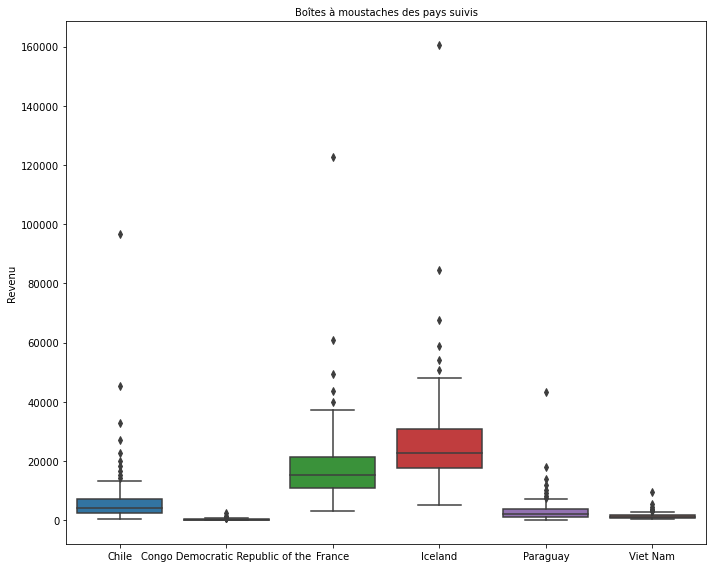

In [128]:
# Affichage des pays suivis
ready_db4 = ready_db3.loc[(ready_db3['Pays'] == 'France') | (ready_db3['Pays'] == 'Congo Democratic Republic of the') |
                          (ready_db3['Pays'] == 'Viet Nam') | (ready_db3['Pays'] == 'Chile') |
                          (ready_db3['Pays'] == 'Iceland') | (ready_db3['Pays'] == 'Paraguay')]

plt.figure(figsize=(10,8))

ax = sns.boxplot(x='Pays', y='y_child', data=ready_db4)

plt.ylabel('Revenu', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.xticks(fontsize=10)
plt.title('Boîtes à moustaches des pays suivis', fontsize=10)

plt.tight_layout()

plt.show()

In [129]:
# Réalisation de l'ANOVA
anova_pays = smf.ols('y_child~Pays', data=ready_db3).fit(alpha=alpha)
print(anova_pays.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     98.43
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:16:50   Log-Likelihood:            -1.1862e+05
No. Observations:               11600   AIC:                         2.375e+05
Df Residuals:                   11484   BIC:                         2.383e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         


R<sup>2</sup> = 0.496  
R<sup>2</sup><sub>ajusté</sub> = 0.491  
La variable pays explique près de 50% de la variance du revenu  
Les autres facteurs non considérés dans le modèle expliquent l'autre moitié de la variance du revenu

In [130]:
print(anova_pays.params)

Intercept                                      2994.829902
Pays[T.Argentina]                              2853.054752
Pays[T.Armenia]                               -1366.447117
Pays[T.Austria]                               13642.770302
Pays[T.Azerbaijan]                             -637.400879
                                                  ...     
Pays[T.United States of America]              22508.751759
Pays[T.Uruguay]                                2295.955018
Pays[T.Venezuela (Bolivarian Republic of)]      172.317822
Pays[T.Viet Nam]                              -1617.055936
Pays[T.Yemen]                                 -1952.194032
Length: 116, dtype: float64


In [131]:
#Un test de significativité
print(anova_pays.summary().tables[1])

                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                   2994.8299    671.390      4.461      0.000    1678.790    4310.870
Pays[T.Argentina]                           2853.0548    949.489      3.005      0.003     991.893    4714.216
Pays[T.Armenia]                            -1366.4471    949.489     -1.439      0.150   -3227.608     494.714
Pays[T.Austria]                             1.364e+04    949.489     14.369      0.000    1.18e+04    1.55e+04
Pays[T.Azerbaijan]                          -637.4009    949.489     -0.671      0.502   -2498.562    1223.760
Pays[T.Bangladesh]                         -1996.1375    949.489     -2.102      0.036   -3857.299    -134.976
Pays[T.Belarus]                              926.3336    949.489      0.976      0.329    -934.828    2787.495
P

In [132]:
print(anova_pays.summary().tables[2])

Omnibus:                    14653.631   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4207431.542
Skew:                           6.739   Prob(JB):                         0.00
Kurtosis:                      95.322   Cond. No.                         117.


In [133]:
# Affichage des resultats du test de Fisher  (Un test global)
test = sm.stats.anova_lm(anova_pays, typ=1)
test

,df,sum_sq,mean_sq,F,PR(>F)
Pays,115.0,5.102375e+11,4.436848e+09,98.429271,0.0
Residual,11484.0,5.176586e+11,4.507651e+07,NaN,NaN


H0: alpha_argentine = ... = alpha_yemen = 0 (Le pays n'a pas d'influence)  
H1: alpha_argentine = ... = alpha_yemen != 0 (Le pays a une influence)  
La p-valeur du Test de Fischer est: ~0.0  
p-valeur <<< 0.05  
On rejette donc l'hypothèse H0 et on conclut que le pays a une influence sur le revenu

<h3 style='color:#8677b2'>Vérification de l'hypothèse gaussienne</h3>

[Haut de page](#sommaire)

In [134]:
anova_pays.resid

0       -2265.931952
1       -2078.167552
2       -1983.913902
3       -1907.922102
4       -1862.130202
            ...     
11595    1526.015230
11596    1851.268130
11597    2264.636330
11598    3094.390530
11599    8007.801630
Length: 11600, dtype: float64

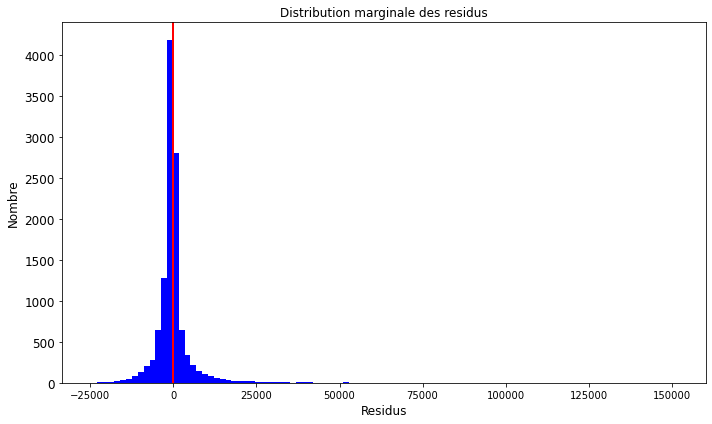

In [135]:
# Préparation des données
X = anova_pays.resid
Xbar = np.mean(X)
Xsprime = np.std(X)

#Représentation de la distribution marginale
plt.figure(figsize=(10,6))

plt.hist(X, 100, facecolor='blue')
plt.axvline(Xbar, color='r', linewidth=2)

plt.title(f'Distribution marginale des residus', fontsize=12)
plt.ylabel('Nombre',fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Residus',fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()


L'allure de l'histogramme est assez classique : centrée et à peu près symétrique.


In [136]:
X.describe()

count    1.160000e+04
mean     4.112327e-13
std      6.680538e+03
min     -2.484011e+04
25%     -1.787273e+03
50%     -3.846401e+02
75%      4.688806e+02
max      1.514250e+05
dtype: float64

In [137]:
# Test d'adequation à une loi (ici Normale) avec le test Kolmogorv-Smirnov
ks_2samp(X,list(np.random.normal(Xbar, Xsprime, 11600)))

KstestResult(statistic=0.249396551724138, pvalue=2.589665e-318)

H0: Les données suivent une loi normale  
H1: Les données ne suivent pas une loi normale  
p-value <<< 0.05, on rejette h0, y_child ne suit pas la loi normale

In [138]:
# Test de Jarque-Bera
JB1, JBpv1, skw1, kurt1 = sm.stats.stattools.jarque_bera(X)
JB1, JBpv1, skw1, kurt1

(4207431.54216031, 0.0, 6.739339356074594, 95.32202335877423)

H0: Les données suivent une loi normale  
H1: Les données ne suivent pas une loi normale  
JBpv ~ 0, on rejette H0, d'après le test, les données ne suivent pas une loi normale

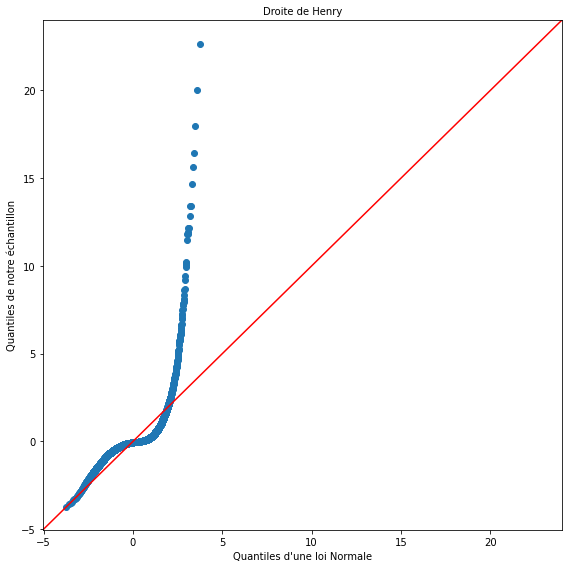

In [139]:
# Droite de Henry
fig, ax = plt.subplots(figsize=(8, 8))

sm.qqplot(X, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=10)
plt.xticks(fontsize=10)
plt.title('Droite de Henry', fontsize=10)

plt.tight_layout()

plt.show()

<a id='14'></a>
## Régression linéaire du revenu enfant sur le revenu moyen du pays et l'indice de Gini

<h3 style='color:#8677b2'>Tests de significativité</h3>

[Haut de page](#sommaire)

In [140]:
reg = smf.ols('y_child ~ Gj + mj', data=ready_db3)
reg_multi = reg.fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     5715.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:16:52   Log-Likelihood:            -1.1862e+05
No. Observations:               11600   AIC:                         2.372e+05
Df Residuals:                   11597   BIC:                         2.373e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.534e-11    328.716  -1.68e-13      1.0

**Test global:**  
H0: beta_GJ = beta_y_mj = 0  
H1: beta_GJ != beta_y_mj != 0  
F ~ 0.00 <<< alpha, on rejette H0, le modèle est globalement significatif

In [141]:
print(reg_multi.params)

Intercept   -5.533707e-11
Gj           2.526690e-10
mj           1.000000e+00
dtype: float64


In [142]:
reg_multi.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-5.534e-11,328.716,-1.68e-13,1.000,-644.338,644.338
Gj,2.527e-10,749.825,3.37e-13,1.000,-1469.784,1469.784
mj,1.0000,0.010,99.934,0.000,0.980,1.020


 **Test de significativité des variables:**
   
H0: beta_Gj = 0  
H1: beta_Gj != 0  
Le paramètre beta_Gj de la variable Gj (indice de gini) n'est pas significatif au niveau de test alpha (0.05)  
En effet p-value ~ 1 > alpha, on accepte H0, le paramètre n'est pas significatif (beta_Gj = 0)  
  
H0: beta_y_mj = 0  
H1: beta_y_mj != 0  
Le paramètre beta_y_mj de la variable mj est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_y_mj != 0)

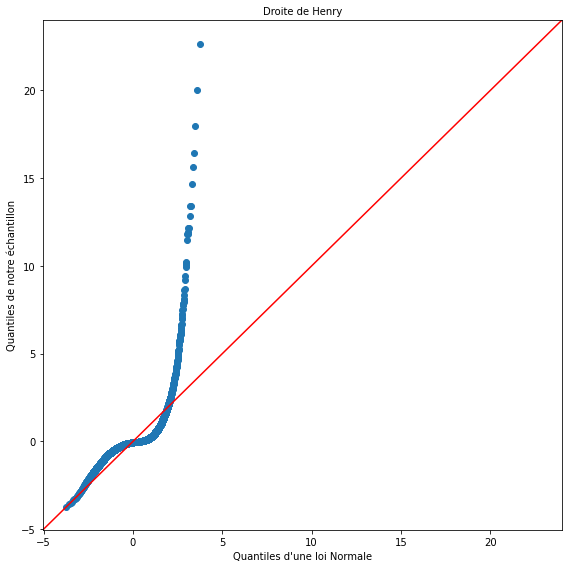

In [143]:
# Droite de Henry

X2 = reg_multi.resid

fig, ax = plt.subplots(figsize=(8, 8))

sm.qqplot(X2, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=10)
plt.xticks(fontsize=10)
plt.title('Droite de Henry', fontsize=10)

plt.tight_layout()

plt.show()

<h3 style='color:#8677b2'>Passage au logarithme du revenu enfant</h3>

In [144]:
reg_ln = smf.ols('ln_y_child ~ Gj + ln_mj', data=ready_db3)
reg_multi_ln = reg_ln.fit()

reg_multi_ln.summary().tables[0]

Dep. Variable:,ln_y_child,R-squared:,0.729
Model:,OLS,Adj. R-squared:,0.729
Method:,Least Squares,F-statistic:,1.558e+04
Date:,"Wed, 09 Mar 2022",Prob (F-statistic):,0.00
Time:,09:16:52,Log-Likelihood:,-12636.
No. Observations:,11600,AIC:,2.528e+04
Df Residuals:,11597,BIC:,2.530e+04
Df Model:,2,,
Covariance Type:,nonrobust,,


**Test global:**  
H0: beta_GJ = beta_ln_mj = 0  
H1: beta_GJ != beta_ln_mj != 0  
F ~ 0.00 <<< alpha, on rejette H0, le modèle est globalement significatif  

In [145]:
reg_multi_ln.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.4961,0.065,7.646,0.000,0.369,0.623
Gj,-1.6523,0.078,-21.101,0.000,-1.806,-1.499
ln_mj,0.9864,0.006,163.259,0.000,0.975,0.998


 **Test de significativité:**
   
H0: beta_Gj = 0  
H1: beta_Gj != 0  
Le paramètre beta_Gj de la variable Gj (indice de gini) est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_Gj != 0)  
  
H0: beta_ln_mj = 0  
H1: beta_ln_mj != 0  
Le paramètre beta_ln_mj de la variable ln_mj est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_ln_mj != 0)

<h3 style='color:#8677b2'>Analyses de $R^2$</h3>

In [146]:
# Anova sur les variables de notre régression linéaire
anova_ln = sm.stats.anova_lm(reg_multi_ln, typ=1)
anova_ln

,df,sum_sq,mean_sq,F,PR(>F)
Gj,1.0,2334.498202,2334.498202,4512.044930,0.0
ln_mj,1.0,13790.334757,13790.334757,26653.526637,0.0
Residual,11597.0,6000.200812,0.517392,NaN,NaN


In [147]:
# Calcul du R2 pour la variable 'Gj'
r2_Gj = anova_ln.sum_sq['Gj'] / anova_ln['sum_sq'].sum()
r2_Gj

0.10551388198747394

In [148]:
# Calcul du R2 pour la variable 'ln_y_child'
r2_ln_mj = anova_ln.sum_sq['ln_mj'] / anova_ln['sum_sq'].sum()
r2_ln_mj

0.6232910150247777

In [149]:
# Vérification
r2_Gj + r2_ln_mj, reg_multi_ln.rsquared

(0.7288048970122516, 0.7288048970122483)

In [150]:
print(f'Dans notre modèle:\n\n\
La variable \'Gj\' explique {100 * r2_Gj:.2f}% de la variance de la variable \'ln_y_child\'\n\n\
La variable \'ln_mj\' explique {100 * r2_ln_mj:.2f}% de la variance de la variable \'ln_y_child\'\n\n\
Notre modèle explique {100 * reg_multi_ln.rsquared:.2f}% de la variance de la variable \'ln_y_child\'')

Dans notre modèle:

La variable 'Gj' explique 10.55% de la variance de la variable 'ln_y_child'

La variable 'ln_mj' explique 62.33% de la variance de la variable 'ln_y_child'

Notre modèle explique 72.88% de la variance de la variable 'ln_y_child'


<a id='atyp1'></a>
<h3 style='color:#8677b2'>Analyse de l'atypicité sur les variables explicatives</h3>

In [151]:
# Paramètres de l'étude
n = ready_db3.shape[0]
p = 3

# Seuil levier selon Belsey
seuil_levier = 2 * p / n
seuil_levier

0.0005172413793103448

In [152]:
# Ajout des termes diagonaux de H
ready_db3['levier'] = reg_multi_ln.get_influence().hat_matrix_diag

display(ready_db3.sort_values(by='levier', ascending=False).head())
display(ready_db3.sort_values(by='levier').head())

,Pays,y_child,mj,Gj,pj,ln_mj,ln_y_child,levier
9551,South Africa,2181.2450,5617.90488,0.682949,0.677,8.633714,7.687651,0.001162
9573,South Africa,4840.1494,5617.90488,0.682949,0.677,8.633714,8.484701,0.001162
9571,South Africa,4413.7783,5617.90488,0.682949,0.677,8.633714,8.392486,0.001162
9570,South Africa,4223.6960,5617.90488,0.682949,0.677,8.633714,8.348466,0.001162
9569,South Africa,4057.1970,5617.90488,0.682949,0.677,8.633714,8.308248,0.001162


,Pays,y_child,mj,Gj,pj,ln_mj,ln_y_child,levier
9097,Romania,9831.8030,3318.337189,0.389527,0.369699,8.107219,9.193378,0.000087
9027,Romania,1746.9655,3318.337189,0.389527,0.369699,8.107219,7.465636,0.000087
9028,Romania,1794.1764,3318.337189,0.389527,0.369699,8.107219,7.492301,0.000087
9029,Romania,1845.0685,3318.337189,0.389527,0.369699,8.107219,7.520272,0.000087
9030,Romania,1890.7778,3318.337189,0.389527,0.369699,8.107219,7.544744,0.000087


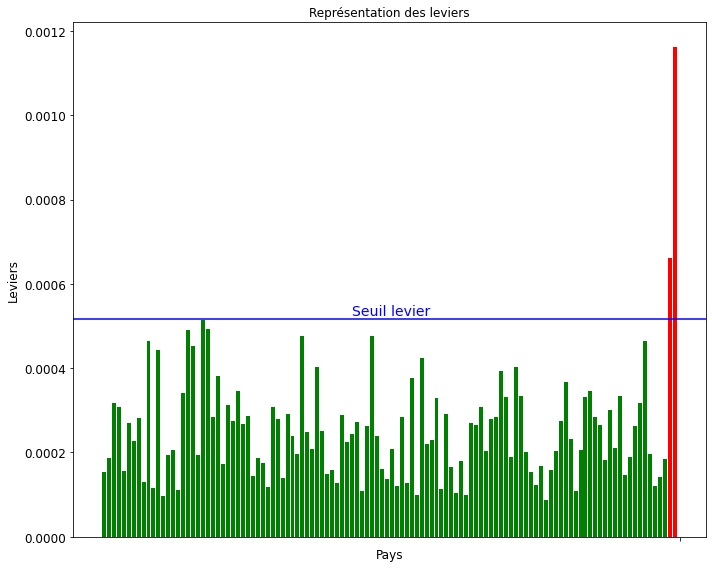

In [153]:
ready_db5 = ready_db3.groupby(['Pays', 'mj', 'Gj', 'pj', 'ln_mj']).mean()
ready_db5.reset_index(inplace=True)

# Représentation des leviers
plt.figure(figsize=(10,8))

# Individus sous le seuil
plt.bar(ready_db5.loc[ready_db5['levier'] <= seuil_levier]['Pays'],
        ready_db5.loc[ready_db5['levier'] <= seuil_levier]['levier'], color='g')

# Individus au dessus du seuil
plt.bar(ready_db5.loc[ready_db5['levier'] > seuil_levier]['Pays'],
        ready_db5.loc[ready_db5['levier'] > seuil_levier]['levier'], color='r')

# Décoration et annotations
plt.title('Représentation des leviers', fontsize=12)
plt.xlabel('Pays', fontsize=12)
plt.xticks('', fontsize=12)
plt.ylabel('Leviers', fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(y=seuil_levier, color='b', linestyle='-')
plt.text(50, 0.000525 , 'Seuil levier', fontsize = '14', color='b')
plt.tight_layout()

plt.show()

In [154]:
# Nombre de valeurs atypiques sur les variables explicatives
lev_ln = ready_db3.loc[ready_db3['levier'] > seuil_levier, :]
len(lev_ln)

200

In [155]:
# Pays presentants des valeurs atypiques
print(ready_db3.shape)
ready_db3.loc[ready_db3['levier'] > seuil_levier]

(11600, 8)


,Pays,y_child,mj,Gj,pj,ln_mj,ln_y_child,levier
4200,Honduras,50.166843,3296.268419,0.615512,0.940737,8.100546,3.915354,0.000662
4201,Honduras,98.061290,3296.268419,0.615512,0.940737,8.100546,4.585593,0.000662
4202,Honduras,138.908390,3296.268419,0.615512,0.940737,8.100546,4.933815,0.000662
4203,Honduras,172.708790,3296.268419,0.615512,0.940737,8.100546,5.151607,0.000662
4204,Honduras,204.631030,3296.268419,0.615512,0.940737,8.100546,5.321209,0.000662
...,...,...,...,...,...,...,...,...
9595,South Africa,24553.568000,5617.904880,0.682949,0.677000,8.633714,10.108612,0.001162
9596,South Africa,28858.031000,5617.904880,0.682949,0.677000,8.633714,10.270144,0.001162
9597,South Africa,35750.290000,5617.904880,0.682949,0.677000,8.633714,10.484314,0.001162
9598,South Africa,46297.316000,5617.904880,0.682949,0.677000,8.633714,10.742839,0.001162


In [156]:
print(ready_db5.shape)
ready_db5.loc[ready_db5['levier'] > seuil_levier]

(116, 8)


,Pays,mj,Gj,pj,ln_mj,y_child,ln_y_child,levier
42,Honduras,3296.268419,0.615512,0.940737,8.100546,3296.268419,7.380957,0.000662
95,South Africa,5617.904880,0.682949,0.677000,8.633714,5617.904880,7.717752,0.001162


<a id='atyp1bis'></a>
<h3 style='color:#8677b2'>Analyse de l'atypicité sur la variable à expliquer (residus studentisés)</h3>

In [157]:
# Détermination du seuil statistique d'atypicité
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
seuil_rstudent

1.9601685822161563

In [158]:
# statistique de test par observation
ready_db3['rstudent'] = reg_multi_ln.get_influence().resid_studentized_internal
display(ready_db3.sort_values(by='rstudent').head())
display(ready_db3.sort_values(by='rstudent').tail())

,Pays,y_child,mj,Gj,pj,ln_mj,ln_y_child,levier,rstudent
5600,Korea Republic of,17.317732,15227.569445,0.367935,0.394000,9.630863,2.851731,0.000238,-9.087780
1600,Canada,122.424810,23739.640518,0.366553,0.269333,10.074902,4.807497,0.000341,-6.980981
1900,China,16.719418,2522.758726,0.493332,0.399000,7.833108,2.816571,0.000193,-6.382910
900,Bolivia,20.584948,3016.263843,0.575719,0.866268,8.011774,3.024560,0.000465,-6.150327
5000,Israel,142.350430,11100.318137,0.429918,0.348050,9.314729,4.958292,0.000224,-5.582806


,Pays,y_child,mj,Gj,pj,ln_mj,ln_y_child,levier,rstudent
999,Bolivia,43786.920,3016.263843,0.575719,0.866268,8.011774,10.687090,0.000465,4.504913
1799,Central African Republic,14472.948,811.299901,0.575972,0.661654,6.698638,9.580037,0.000490,4.767232
9599,South Africa,82408.550,5617.904880,0.682949,0.677000,8.633714,11.319444,0.001162,4.779222
4299,Honduras,56265.700,3296.268419,0.615512,0.940737,8.100546,10.937840,0.000662,4.823737
4099,Guatemala,39799.406,2142.474753,0.582468,1.015206,7.669717,10.591607,0.000476,4.856839


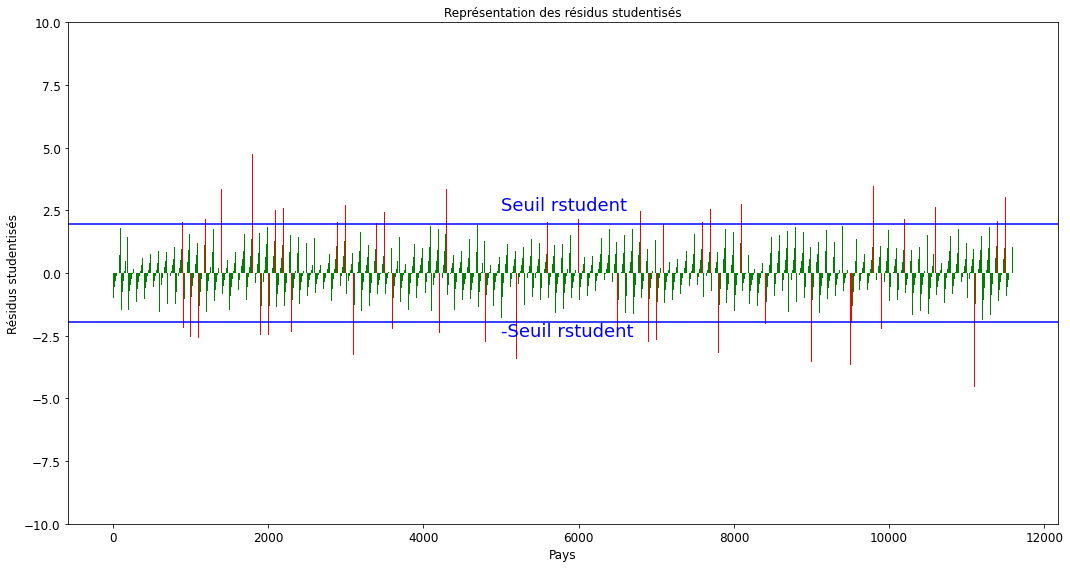

In [159]:
ready_db6 = ready_db3.groupby(['Pays', 'mj', 'Gj', 'pj', 'ln_mj', 'rstudent']).mean()
ready_db6.reset_index(inplace=True)

# Représentation des leviers
plt.figure(figsize=(15,8))

# Individus entre le seuil mini et le seuil maxi
plt.bar(ready_db6.loc[(ready_db6['rstudent'] <= seuil_rstudent) & (ready_db6['rstudent'] >= -seuil_rstudent)].index,
        ready_db6.loc[(ready_db6['rstudent'] <= seuil_rstudent) & (ready_db6['rstudent'] >= -seuil_rstudent)]['rstudent'], color='g')

# Individus au dessus du seuil maxi
plt.bar(ready_db6.loc[ready_db6['rstudent'] > seuil_rstudent].index,
        ready_db6.loc[ready_db6['rstudent'] > seuil_rstudent]['rstudent'], color='r')

# Individus au dessous du seuil mini
plt.bar(ready_db6.loc[ready_db6['rstudent'] < -seuil_rstudent].index,
        ready_db6.loc[ready_db6['rstudent'] < -seuil_rstudent]['rstudent'], color='r')

# Décoration et annotations
plt.title('Représentation des résidus studentisés', fontsize=12)
plt.xlabel('Pays', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-10,10)
plt.ylabel('Résidus studentisés', fontsize=12)
plt.yticks(fontsize=12)

plt.axhline(y=seuil_rstudent, color='b', linestyle='-')
plt.text(5_000, 2.5 , 'Seuil rstudent', fontsize = '18', color='b')

plt.axhline(y=-seuil_rstudent, color='b', linestyle='-')
plt.text(5_000, -2.5 , '-Seuil rstudent', fontsize = '18', color='b')

plt.tight_layout()

plt.show()

In [160]:
# Nombre de valeurs atypiques sur les variables à expliquer
res_stu_ln = ready_db6.loc[(ready_db6['rstudent'] > seuil_rstudent) |
                             (ready_db6['rstudent'] < -seuil_rstudent)]

len(res_stu_ln)

640

In [161]:
# Pays presentants des valeurs atypiques
ready_db6.loc[ready_db6.index.isin(res_stu_ln.index)].groupby(by='Pays').count().sort_values(by='y_child',
                                                                                             ascending=False)

,mj,Gj,pj,ln_mj,rstudent,y_child,ln_y_child,levier
Pays,,,,,,,,
South Africa,29,29,29,29,29,29,29,29
Honduras,22,22,22,22,22,22,22,22
Bolivia,20,20,20,20,20,20,20,20
Colombia,17,17,17,17,17,17,17,17
Panama,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...
Serbia,1,1,1,1,1,1,1,1
Taiwan Republic of China,1,1,1,1,1,1,1,1
Pakistan,1,1,1,1,1,1,1,1


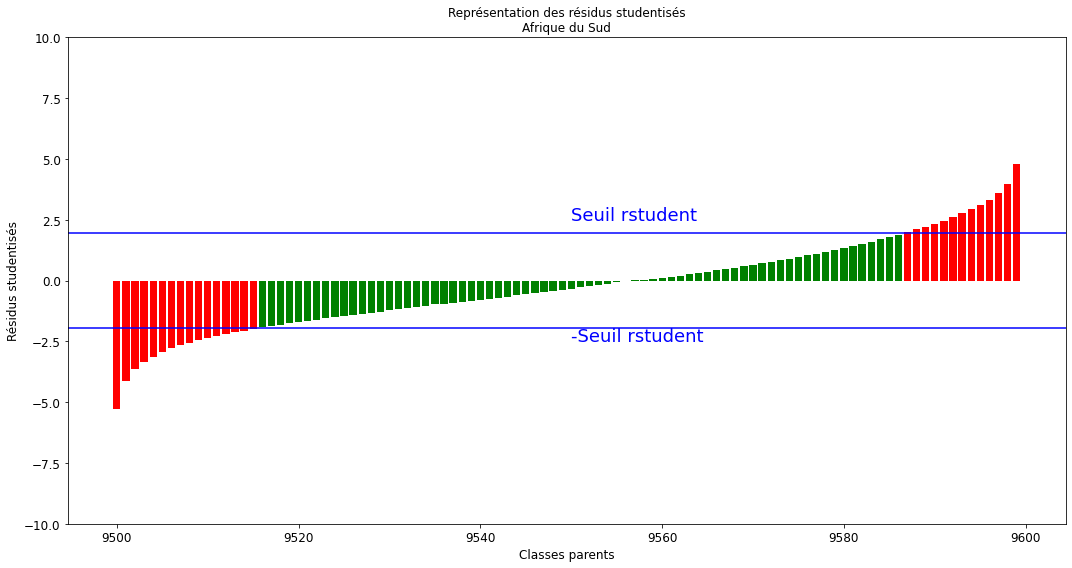

In [162]:
ready_db_saf = ready_db6.loc[(ready_db6['Pays'] == 'South Africa')]

# Représentation des leviers
plt.figure(figsize=(15,8))

# Individus entre le seuil mini et le seuil maxi
plt.bar(ready_db_saf.loc[(ready_db_saf['rstudent'] <= seuil_rstudent) & (ready_db_saf['rstudent'] >= -seuil_rstudent)].index,
        ready_db_saf.loc[(ready_db_saf['rstudent'] <= seuil_rstudent) & (ready_db_saf['rstudent'] >= -seuil_rstudent)]['rstudent'], color='g')

# Individus au dessus du seuil maxi
plt.bar(ready_db_saf.loc[ready_db_saf['rstudent'] > seuil_rstudent].index,
        ready_db_saf.loc[ready_db_saf['rstudent'] > seuil_rstudent]['rstudent'], color='r')

# Individus au dessous du seuil maxi
plt.bar(ready_db_saf.loc[ready_db_saf['rstudent'] < -seuil_rstudent].index,
        ready_db_saf.loc[ready_db_saf['rstudent'] < -seuil_rstudent]['rstudent'], color='r')

# Décoration et annotations
plt.title('Représentation des résidus studentisés\nAfrique du Sud', fontsize=12)
plt.xlabel('Classes parents', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-10,10)
plt.yticks(fontsize=12)
plt.ylabel('Résidus studentisés', fontsize=12)

plt.axhline(y=seuil_rstudent, color='b', linestyle='-')
plt.text(9550, 2.5 , 'Seuil rstudent', fontsize = '18', color='b')

plt.axhline(y=-seuil_rstudent, color='b', linestyle='-')
plt.text(9550, -2.5 , '-Seuil rstudent', fontsize = '18', color='b')

plt.tight_layout()

plt.show()

<a id='infl1'></a>
<h3 style='color:#8677b2'>Analyse de l'influence des observations</h3>

In [163]:
# Création du dataframe avec tous les resultats d'influences disponibles
influence_ln = reg_multi_ln.get_influence().summary_frame()
influence_ln.head()

,dfb_Intercept,dfb_Gj,dfb_ln_mj,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.012627,0.014549,0.005306,0.000161,-1.764461,0.000155,-0.021960,-1.764622,-0.021962
1,-0.010346,0.011921,0.004348,0.000108,-1.445786,0.000155,-0.017994,-1.445854,-0.017995
2,-0.009372,0.010799,0.003938,0.000089,-1.309708,0.000155,-0.016300,-1.309749,-0.016301
3,-0.008651,0.009968,0.003635,0.000075,-1.208936,0.000155,-0.015046,-1.208960,-0.015046
4,-0.008240,0.009495,0.003463,0.000068,-1.151560,0.000155,-0.014332,-1.151576,-0.014332


In [164]:
# Ajout de la colonne distance de Cook à notre dataframe analyses_ln
ready_db3['dcooks'] = influence_ln['cooks_d']

# Seuil d'influence selon Cook
seuil_dcook = 4/(n-p)

display(ready_db3.sort_values(by='dcooks').head())
display(ready_db3.sort_values(by='dcooks').tail())

,Pays,y_child,mj,Gj,pj,ln_mj,ln_y_child,levier,rstudent,dcooks
9951,Swaziland,362.52875,530.283828,0.478735,0.629976,6.273412,5.893104,0.000332,0.000087,8.446875e-13
1352,Burkina Faso,693.67725,917.952658,0.413469,0.661654,6.822146,6.542007,0.000195,-0.000172,1.922609e-12
10251,Taiwan Republic of China,13724.78200,16500.223670,0.331487,0.181000,9.711129,9.526958,0.000266,-0.000317,8.879644e-12
6853,Mali,576.89970,681.075039,0.346782,0.713953,6.523672,6.357668,0.000328,-0.000336,1.234295e-11
2654,Czech Republic,7657.33450,8235.293411,0.270162,0.434041,9.016184,8.943419,0.000274,0.000528,2.549086e-11


,Pays,y_child,mj,Gj,pj,ln_mj,ln_y_child,levier,rstudent,dcooks
9598,South Africa,46297.316000,5617.904880,0.682949,0.677,8.633714,10.742839,0.001162,3.977135,0.006135
9501,South Africa,138.341550,5617.904880,0.682949,0.677,8.633714,4.929726,0.001162,-4.109191,0.006549
5600,Korea Republic of,17.317732,15227.569445,0.367935,0.394,9.630863,2.851731,0.000238,-9.087780,0.006565
9599,South Africa,82408.550000,5617.904880,0.682949,0.677,8.633714,11.319444,0.001162,4.779222,0.008859
9500,South Africa,60.490383,5617.904880,0.682949,0.677,8.633714,4.102484,0.001162,-5.259924,0.010731


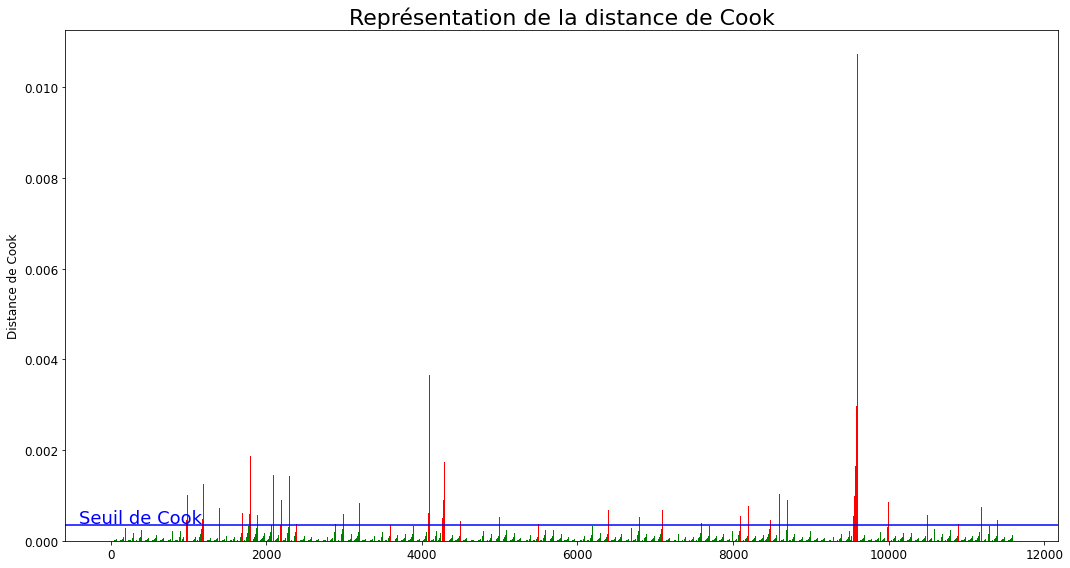

In [165]:
ready_db7 = ready_db3.groupby(['Pays', 'mj', 'Gj', 'pj', 'ln_mj', 'dcooks']).mean()
ready_db7.reset_index(inplace=True)

# Représentation de la distances de Cooks
plt.figure(figsize=(15,8))

# Individus sous le seuil
plt.bar(ready_db7.loc[ready_db7['dcooks'] <= seuil_dcook].index,
        ready_db7.loc[ready_db7['dcooks'] <= seuil_dcook]['dcooks'],
       color='g')

# Individus au dessus le seuil
plt.bar(ready_db7.loc[ready_db7['dcooks'] > seuil_dcook].index,
        ready_db7.loc[ready_db7['dcooks'] > seuil_dcook]['dcooks'],
       color='r')

# Décoration et annotations
plt.title('Représentation de la distance de Cook', fontsize=22)
plt.ylabel('Distance de Cook', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.text(-400, (seuil_dcook + 0.00005), 'Seuil de Cook', fontsize = '18', color='b')
plt.axhline(y=seuil_dcook, color='b', linestyle='-')

plt.tight_layout()

plt.show()

In [166]:
# Nombre d'observations influentes
dco_ln = ready_db3.loc[ready_db3['dcooks'] > seuil_dcook]
len(dco_ln)

657

In [167]:
# Pays présentants des obervations au dela du seuil
ready_db7.loc[ready_db7.index.isin(dco_ln.index)].groupby(by='Pays').count().sort_values(by='y_child',
                                                                                         ascending=False)

,mj,Gj,pj,ln_mj,dcooks,y_child,ln_y_child,levier,rstudent
Pays,,,,,,,,,
South Africa,62,62,62,62,62,62,62,62,62
Honduras,44,44,44,44,44,44,44,44,44
Bolivia,31,31,31,31,31,31,31,31,31
Colombia,31,31,31,31,31,31,31,31,31
Central African Republic,26,26,26,26,26,26,26,26,26
...,...,...,...,...,...,...,...,...,...
Mauritania,1,1,1,1,1,1,1,1,1
Morocco,1,1,1,1,1,1,1,1,1
Nepal,1,1,1,1,1,1,1,1,1


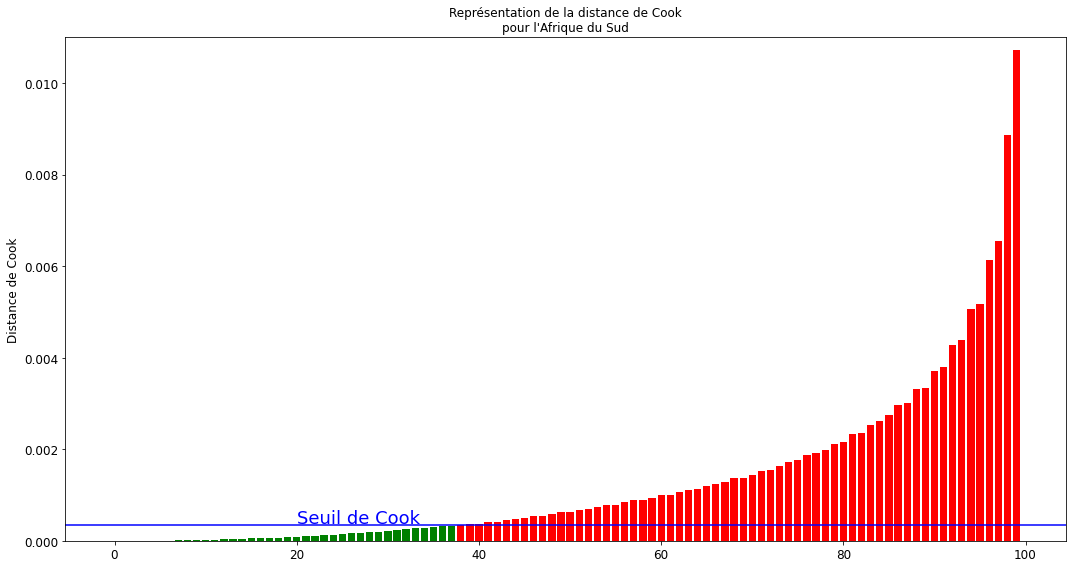

In [168]:
ready_db_saf1 = ready_db7.loc[ready_db7['Pays'] == 'South Africa']
ready_db_saf1.reset_index(inplace=True)

# Représentation de la distances de Cooks
plt.figure(figsize=(15,8))

# Individus sous le seuil
plt.bar(ready_db_saf1.loc[ready_db_saf1['dcooks'] <= seuil_dcook].index,
        ready_db_saf1.loc[ready_db_saf1['dcooks'] <= seuil_dcook]['dcooks'],
       color='g')

# Individus au dessus le seuil
plt.bar(ready_db_saf1.loc[ready_db_saf1['dcooks'] > seuil_dcook].index,
        ready_db_saf1.loc[ready_db_saf1['dcooks'] > seuil_dcook]['dcooks'],
       color='r')

# Décoration et annotations
plt.title('Représentation de la distance de Cook\npour l\'Afrique du Sud', fontsize=12)
plt.ylabel('Distance de Cook', fontsize=12)
plt.ylim(0,0.011)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.text(20, (seuil_dcook + 0.00005), 'Seuil de Cook', fontsize = '18', color='b')
plt.axhline(y=seuil_dcook, color='b', linestyle='-')

plt.tight_layout()

plt.show()

<a id='atyp_infl1'></a>
<h3 style='color:#8677b2'>Mesures atypiques et influentes</h3>

In [169]:
ready_db3.head()

,Pays,y_child,mj,Gj,pj,ln_mj,ln_y_child,levier,rstudent,dcooks
0,Albania,728.89795,2994.829902,0.32141,0.815874,8.004643,6.591534,0.000155,-1.764461,0.000161
1,Albania,916.66235,2994.829902,0.32141,0.815874,8.004643,6.820739,0.000155,-1.445786,0.000108
2,Albania,1010.91600,2994.829902,0.32141,0.815874,8.004643,6.918612,0.000155,-1.309708,0.000089
3,Albania,1086.90780,2994.829902,0.32141,0.815874,8.004643,6.991092,0.000155,-1.208936,0.000075
4,Albania,1132.69970,2994.829902,0.32141,0.815874,8.004643,7.032359,0.000155,-1.151560,0.000068


In [170]:
# Obeservations atypiques et influentes
ind_aty_infl_ln = ready_db3.loc[((ready_db3['dcooks'] > seuil_dcook) &
                                  (ready_db3['rstudent'] > seuil_rstudent) &
                                  (ready_db3['levier'] > seuil_levier)) |
                                  ((ready_db3['dcooks'] > seuil_dcook) &
                                  (ready_db3['rstudent'] < -seuil_rstudent) &
                                  (ready_db3['levier'] > seuil_levier))]
len(ind_aty_infl_ln)

51

In [171]:
# Pays contenants les observations influentes et atypiques
susp_pt = ready_db3.loc[ready_db3.index.isin(ind_aty_infl_ln.index)]
susp_pt.reset_index(inplace=True)
susp_pt.groupby('Pays').count()

,index,y_child,mj,Gj,pj,ln_mj,ln_y_child,levier,rstudent,dcooks
Pays,,,,,,,,,,
Honduras,22,22,22,22,22,22,22,22,22,22
South Africa,29,29,29,29,29,29,29,29,29,29


<a id='vif1'></a>
<h3 style='color:#8677b2'>Détection des problèmes de colinéarité</h3>

In [172]:
variables = reg_multi_ln.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0769055273597465, 1.076905527359738]

une valeur VIFj>10 ( TOLj<0.1 ) indique un problème de colinéarité éventuel.

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.


<h3 style='color:#8677b2'>Test d'homoscédasticité</h3>

In [173]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi_ln.resid, reg_multi_ln.model.exog)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.9992643813628824e-154


H0: Homoscédasticité  
H1: Hétéroscédasticité  
pvalue <<< alpha, rejet de H0, il y a hétéroscédasticité des residus  
Encore une fois, le modèle de regression linéaire multiple est suffisamment robuste pour les grands échantillons. 11_660 ici, c'est notre cas.  
Plus on a de données à disposition, plus le modèle est capable de supporter des écarts important aux hypothèse (gaussienne et homoscédastique)

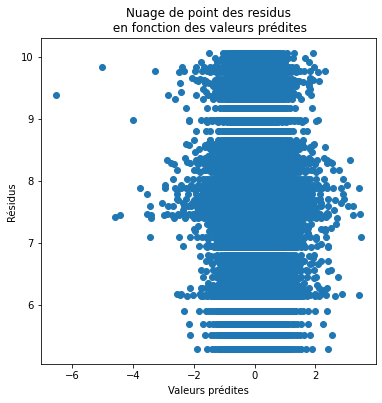

In [174]:
# Représentation des résidus en fonction des valeurs prédites
plt.figure(figsize=(6,6))

plt.scatter(reg_multi_ln.resid, reg_multi_ln.predict())

plt.ylabel('Résidus')
plt.xlabel('Valeurs prédites')
plt.title('Nuage de point des residus\n en fonction des valeurs prédites')

plt.show()

<h3 style='color:#8677b2'>Test de normalité des résidus</h3>

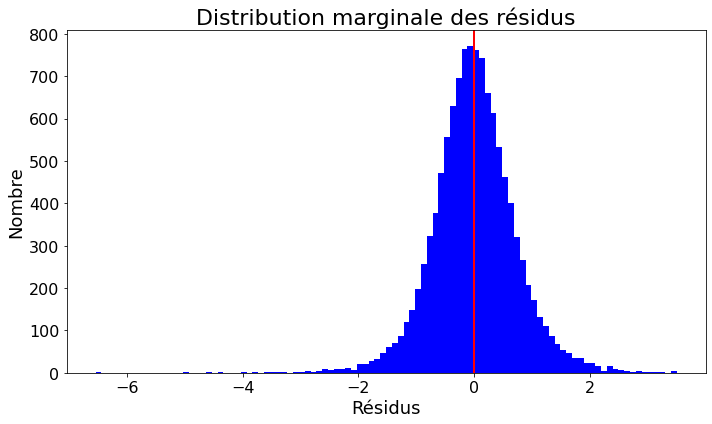

In [175]:
#Représentation de la distribution marginale
X_ln = reg_multi_ln.resid
Xbar_ln = np.mean(X_ln)
Xsprime_ln = np.std(X_ln)
plt.figure(figsize=(10,6,))

plt.hist(X_ln, 100, facecolor='blue',)
plt.axvline(Xbar_ln, color='r', linewidth=2)

plt.title(f'Distribution marginale des résidus', fontsize=22)
plt.ylabel('Nombre', fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Résidus', fontsize=18)
plt.xticks(fontsize=16)

plt.tight_layout()

plt.show()

In [176]:
# Préparation des données
X_ln = reg_multi_ln.resid
Xbar_ln = np.mean(X_ln)
Xsprime_ln = np.std(X_ln)

# Test d'adequation à une loi (ici Normale) avec le test Kolmogorv-Smirnov
ks_2samp(reg_multi_ln.resid, list(np.random.normal(Xbar_ln, Xsprime_ln, 11_600)))

KstestResult(statistic=0.040172413793103434, pvalue=1.4343139406067153e-08)

H0: Les données suivent une loi normale  
H1: Les données ne suivent pas une loi normale  
p-value <<< 0.05, on rejette H0, y_child ne suit pas une loi normale

In [177]:
# Test de Jarque-Bera (test de normalité basé sur le kurtosis et le skewness)
JB_ln, JBpv_ln, skw_ln, kurt_ln = sm.stats.stattools.jarque_bera(reg_multi_ln.resid)
JB_ln, JBpv_ln, skw_ln, kurt_ln

(3504.761098891507, 0.0, -0.08087638372158601, 5.6879482699635435)

H0: Les données suivent une loi normale  
H1: Les données ne suivent pas une loi normale  
JBpv ~ 0, on rejette H0, d'après le test, les données ne suivent pas une loi normale

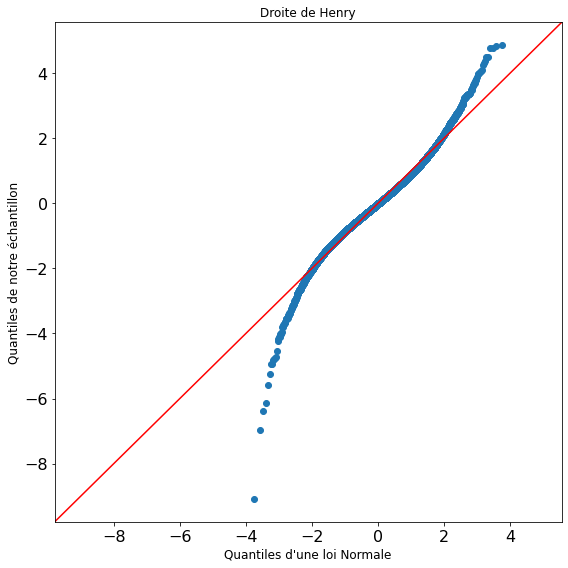

In [178]:
# Droite de Henry
fig, ax = plt.subplots(figsize=(8, 8))

sm.qqplot(reg_multi_ln.resid, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon', fontsize=12)
plt.yticks(fontsize=16)
plt.xlabel('Quantiles d\'une loi Normale', fontsize=12)
plt.xticks(fontsize=16)
plt.title('Droite de Henry')

plt.tight_layout()

plt.show()

La droite de Henry represente la distribution empirique des residus et la distribution théorique d'une loi normale.  
Sauf pour les valeurs faibles de nos résidus, nos residus semblent plutôt alignés avec la distribution théorique d'une loi normale.

<a id='15'></a>
## Régression linéaire du revenu enfant sur le revenu moyen du pays, l'indice de Gini et la classe de revenus des parents

[Haut de page](#sommaire)

<h3 style='color:#8677b2'>Tests de significativité</h3>

In [179]:
reg2 = smf.ols('y_child ~ Gj + mj + c_i_parent', data=ready_db2)
reg_multi2 = reg2.fit()
reg_multi2.summary().tables[0]

Dep. Variable:,y_child,R-squared:,0.522
Model:,OLS,Adj. R-squared:,0.522
Method:,Least Squares,F-statistic:,2.113e+06
Date:,"Wed, 09 Mar 2022",Prob (F-statistic):,0.00
Time:,09:18:53,Log-Likelihood:,-5.9157e+07
No. Observations:,5800000,AIC:,1.183e+08
Df Residuals:,5799996,BIC:,1.183e+08
Df Model:,3,,
Covariance Type:,nonrobust,,


**Test global:**  
H0: beta_GJ = beta_mj = beta_c_i_parent = 0  
H1: beta_GJ != beta_mj = beta_c_i_parent != 0  
F ~ 0.00 <<< alpha, on rejette H0, le modèle est globalement significatif

In [180]:
reg_multi2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2646.5631,15.078,-175.530,0.000,-2676.114,-2617.012
Gj,-0.6155,32.658,-0.019,0.985,-64.625,63.393
mj,1.0000,0.000,2294.447,0.000,0.999,1.001
c_i_parent,52.4153,0.094,559.776,0.000,52.232,52.599


 **Test de significativité:**
   
H0: beta_Gj = 0  
H1: beta_Gj != 0  
Le paramètre beta_Gj de la variable Gj (indice de gini) n'est pas significatif au niveau de test alpha (0.05)  
En effet p-value ~ 1 > alpha, on accepte H0, le paramètre n'est pas significatif (beta_Gj = 0)  
  
H0: beta_mj = 0  
H1: beta_mj != 0  
Le paramètre beta_mj de la variable mj est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_mj != 0)  
  
H0: beta_c_i_parent = 0  
H1: beta_c_i_parent != 0  
Le paramètre beta_c_i_parent de la variable c_i_parent est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_c_i_parent != 0)  

<h3 style='color:#8677b2'>Passage au logarithme du revenu enfant</h3>

In [181]:
reg_ln2 = smf.ols('ln_y_child ~ Gj + ln_mj + c_i_parent', data=ready_db2)
reg_multi_ln2 = reg_ln2.fit()

reg_multi_ln2.summary().tables[0]

Dep. Variable:,ln_y_child,R-squared:,0.785
Model:,OLS,Adj. R-squared:,0.785
Method:,Least Squares,F-statistic:,7.056e+06
Date:,"Wed, 09 Mar 2022",Prob (F-statistic):,0.00
Time:,09:18:57,Log-Likelihood:,-5.6456e+06
No. Observations:,5800000,AIC:,1.129e+07
Df Residuals:,5799996,BIC:,1.129e+07
Df Model:,3,,
Covariance Type:,nonrobust,,


**Test global:**  
H0: beta_GJ = beta_ln_mj = beta_c_i_parent = 0  
H1: beta_GJ != beta_ln_mj = beta_c_i_parent != 0  
F ~ 0.00 <<< alpha, on rejette H0, le modèle est globalement significatif

In [182]:
reg_multi_ln2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0764,0.003,-29.089,0.000,-0.082,-0.071
Gj,-1.6524,0.003,-529.943,0.000,-1.658,-1.646
ln_mj,0.9864,0.000,4099.917,0.000,0.986,0.987
c_i_parent,0.0113,9.22e-06,1230.409,0.000,0.011,0.011


**Test de significativité:**
   
H0: beta_Gj = 0  
H1: beta_Gj != 0  
Le paramètre beta_Gj de la variable Gj (indice de gini) n'est pas significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0<<< alpha, on rejette H0, le paramètre est significatif (beta_Gj = 0)  
  
H0: beta_ln_mj = 0  
H1: beta_ln_mj != 0  
Le paramètre beta_ln_mj de la variable ln_mj est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_ln_mj != 0)  
  
H0: beta_c_i_parent = 0  
H1: beta_c_i_parent != 0  
Le paramètre beta_c_i_parent de la variable c_i_parent est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_c_i_parent != 0)  

<h3 style='color:#8677b2'>Analyses de $R^2$</h3>

In [183]:
# Anova sur notre régression linéaire
anova2 = sm.stats.anova_lm(reg_multi_ln2, typ=1)
anova2

,df,sum_sq,mean_sq,F,PR(>F)
Gj,1.0,1.167249e+06,1.167249e+06,2.845620e+06,0.0
ln_mj,1.0,6.895162e+06,6.895162e+06,1.680962e+07,0.0
c_i_parent,1.0,6.209916e+05,6.209916e+05,1.513907e+06,0.0
Residual,5799996.0,2.379109e+06,4.101914e-01,NaN,NaN


In [184]:
# Calcul du R2 pour la variable 'c_i_parent'
r2_c_i_parent = anova2.iloc[2,1] / anova2['sum_sq'].sum()
r2_c_i_parent

0.05613477721547998

In [185]:
# Vérification
r2_Gj + r2_ln_mj + r2_c_i_parent, reg_multi_ln2.rsquared

(0.7849396742277316, 0.7849396564243232)

In [186]:
print(f'Dans notre modèle:\n\n\
La variable \'Gj\' explique {100 * r2_Gj:.2f}% de la variance de la variable \'ln_y_child\'\n\n\
La variable \'ln_y_child_moy\' explique {100 * r2_ln_mj:.2f}% de la variance de la variable \'ln_y_child\'\n\n\
La variable \'c_i_parent\' explique {100 * r2_c_i_parent:.2f}% de la variance de la variable \'ln_y_child\'\n\n\
Notre modèle explique {100 * reg_multi_ln2.rsquared:.2f}% de la variance de la variable \'ln_y_child\'')

Dans notre modèle:

La variable 'Gj' explique 10.55% de la variance de la variable 'ln_y_child'

La variable 'ln_y_child_moy' explique 62.33% de la variance de la variable 'ln_y_child'

La variable 'c_i_parent' explique 5.61% de la variance de la variable 'ln_y_child'

Notre modèle explique 78.49% de la variance de la variable 'ln_y_child'


<a id='vif2'></a>
<h3 style='color:#8677b2'>Détection des problèmes de colinéarité</h3>

In [187]:
# Facteur d'influence de la variance (Variance Inflation Factor)
variables_ln2 = reg_multi_ln2.model.exog
[variance_inflation_factor(variables_ln2, i) for i in np.arange(1,variables_ln2.shape[1])]

[1.076905527964273, 1.0769055283396562, 1.0000000011732266]

 * VIF_Gj et VIF_ln_y_child_moy < 10 (ou 5)  
Pas de problème de colinéarité

<a id='breu2'></a>
<h3 style='color:#8677b2'>Test d'homoscédasticité</h3>

In [188]:
_, pval2, __, f_pval2 = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi_ln2.resid, variables_ln2)
print('p value test Breusch Pagan:', pval2)

p value test Breusch Pagan: 0.0


H0: Homoscédasticité  
H1: Hétéroscédasticité  
pvalue <<< alpha, rejet de H0, il y a hétéroscédasticité des residus  
Toutefois, le modèle de regression linéaire multiple est robuste pour les grands échantillon. 5_800_000 ici, c'est notre cas.  
Plus on a de données à disposition, plus le modèle est capable de supporter des écarts important aux hypothèse (gaussienne et homoscédastique)

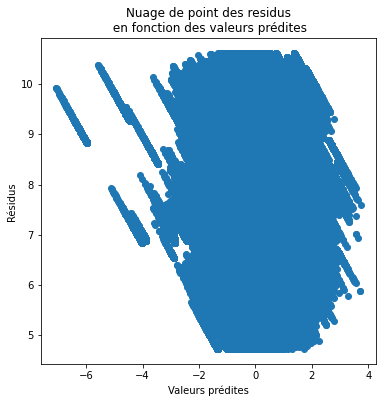

In [189]:
# Représentation des résidus en fonction des valeurs prédites
plt.figure(figsize=(6,6))

plt.scatter(reg_multi_ln2.resid, reg_multi_ln2.predict())

plt.ylabel('Résidus')
plt.xlabel('Valeurs prédites')
plt.title('Nuage de point des residus\n en fonction des valeurs prédites')

plt.show()

<h3 style='color:#8677b2'>Test de normalité des résidus</h3>

In [190]:
# Test d'adequation à une loi (ici Normale) avec le test Kolmogorv-Smirnov
X_ln2 = reg_multi_ln2.resid
Xbar_ln2 = np.mean(X_ln2)
Xsprime_ln2 = np.std(X_ln2)

ks_2samp(reg_multi_ln2.resid, list(np.random.normal(Xbar_ln2, Xsprime_ln2, 5_800_000)))

KstestResult(statistic=0.027054655172413816, pvalue=0.0)

H0: Les données suivent une loi normale  
H1: Les données ne suivent pas une loi normale  
p-value <<< 0.05, on rejette H0, y_child ne suit pas une loi normale

In [191]:
# Test de Jarque-Bera (test de normalité basé sur le kurtosis et le skewness)
JB_ln1, JBpv_ln1, skw_ln1, kurt_ln1 = sm.stats.stattools.jarque_bera(reg_multi_ln2.resid)
JB_ln1, JBpv_ln1, skw_ln1, kurt_ln1

(1822763.0594165707, 0.0, -0.13239282636922206, 5.733561118792196)

H0: Les données suivent une loi normale  
H1: Les données ne suivent pas une loi normale  
JBpv ~ 0, on rejette H0, d'après le test, les données ne suivent pas une loi normale

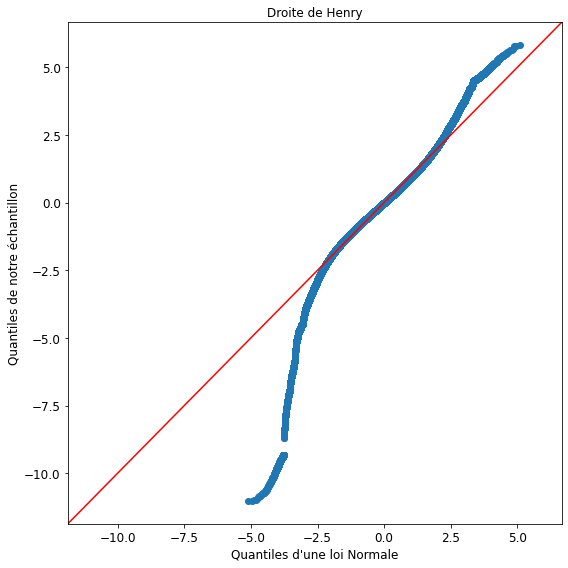

In [192]:
# Droite de Henry
fig, ax = plt.subplots(figsize=(8, 8))

sm.qqplot(X_ln2, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon',fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=12)
plt.xticks(fontsize=12)
plt.title('Droite de Henry',fontsize=12)

plt.tight_layout()

plt.show()

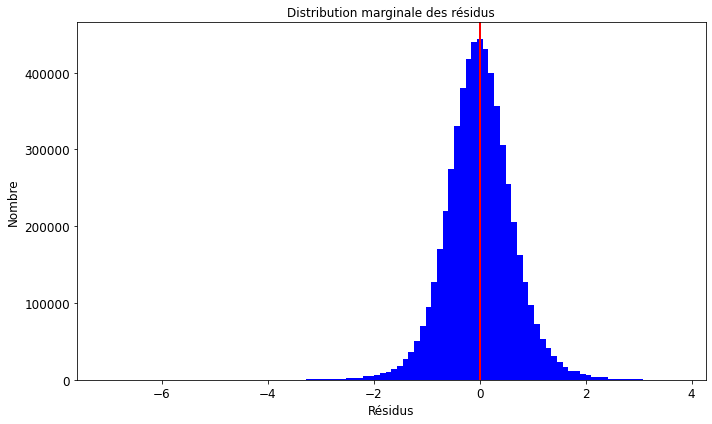

Executing shutdown due to inactivity...


2022-03-09 10:43:52,341 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-03-09 10:44:04,724 - INFO     - Executing shutdown...


In [193]:
#Représentation de la distribution marginale
plt.figure(figsize=(10,6))

plt.hist(X_ln2, 100, facecolor='blue')
plt.axvline(Xbar_ln2, color='r', linewidth=2)

plt.title(f'Distribution marginale des résidus', fontsize=12)
plt.ylabel('Nombre',fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Résidus', fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()

plt.show()